In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../Functions and Dictionaries/") # Adds higher directory to python modules path
import geodict
namestocommon = geodict.namestocommon

In [4]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [5]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [6]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [7]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat, n, start_idx=0):
    for idx, (j, k) in enumerate(zip(x, y)):
        if idx >= start_idx and (idx - start_idx) % n == 0:
            label = labelformat.format(k)
            plt.annotate(label, (j, k), textcoords='offset points', xytext=(xoffset, yoffset), ha='center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [8]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = '#314454', '#597952', '#66a141', '#0f2e39', '#dcdedf', '#797e80', '#535455', '#30523b', '#8494a4'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9, GNRCLIGHTBLUE]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [9]:
#Unincorporated and Incorporated so different where it's offered so just listing geos every time
#['Rutherford Unincorporated', 'Rutherford County', 'Tennessee', 'GNRC', 'Eagleville', 'La Vergne', 'Murfreesboro', 'Nolensville', 'Smyrna']
unincorporated = 'Wilson Unincorporated'
county = 'Wilson County'
region = 'GNRC'
state = 'Tennessee'

In [17]:
#HUD Disaggregated current year Residential Permits
conn = sq.connect('../../Pipeline-Housing-and-Urban-Development/Outputs/HUD.db')
sql_query = pd.read_sql('SELECT * FROM [AllPermitTypes_2023]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Wilson County', 'Wilson Unincorporated', 'GNRC', 'Lebanon', 'Mount Juliet', 'Watertown']
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('GEO_ID')
data[cols] = data[cols].astype(float)
hudcurrent = data

In [18]:
#HUD Total, All Multi-Fam, and All Single-Fam Residential Permits Over Time
conn = sq.connect('../../Pipeline-Housing-and-Urban-Development/Outputs/HUD.db')
sql_query = pd.read_sql('SELECT * FROM [SingleMulti_Historic]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Wilson County', 'Wilson Unincorporated', 'GNRC', 'Lebanon', 'Mount Juliet', 'Watertown']
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
hudann = data

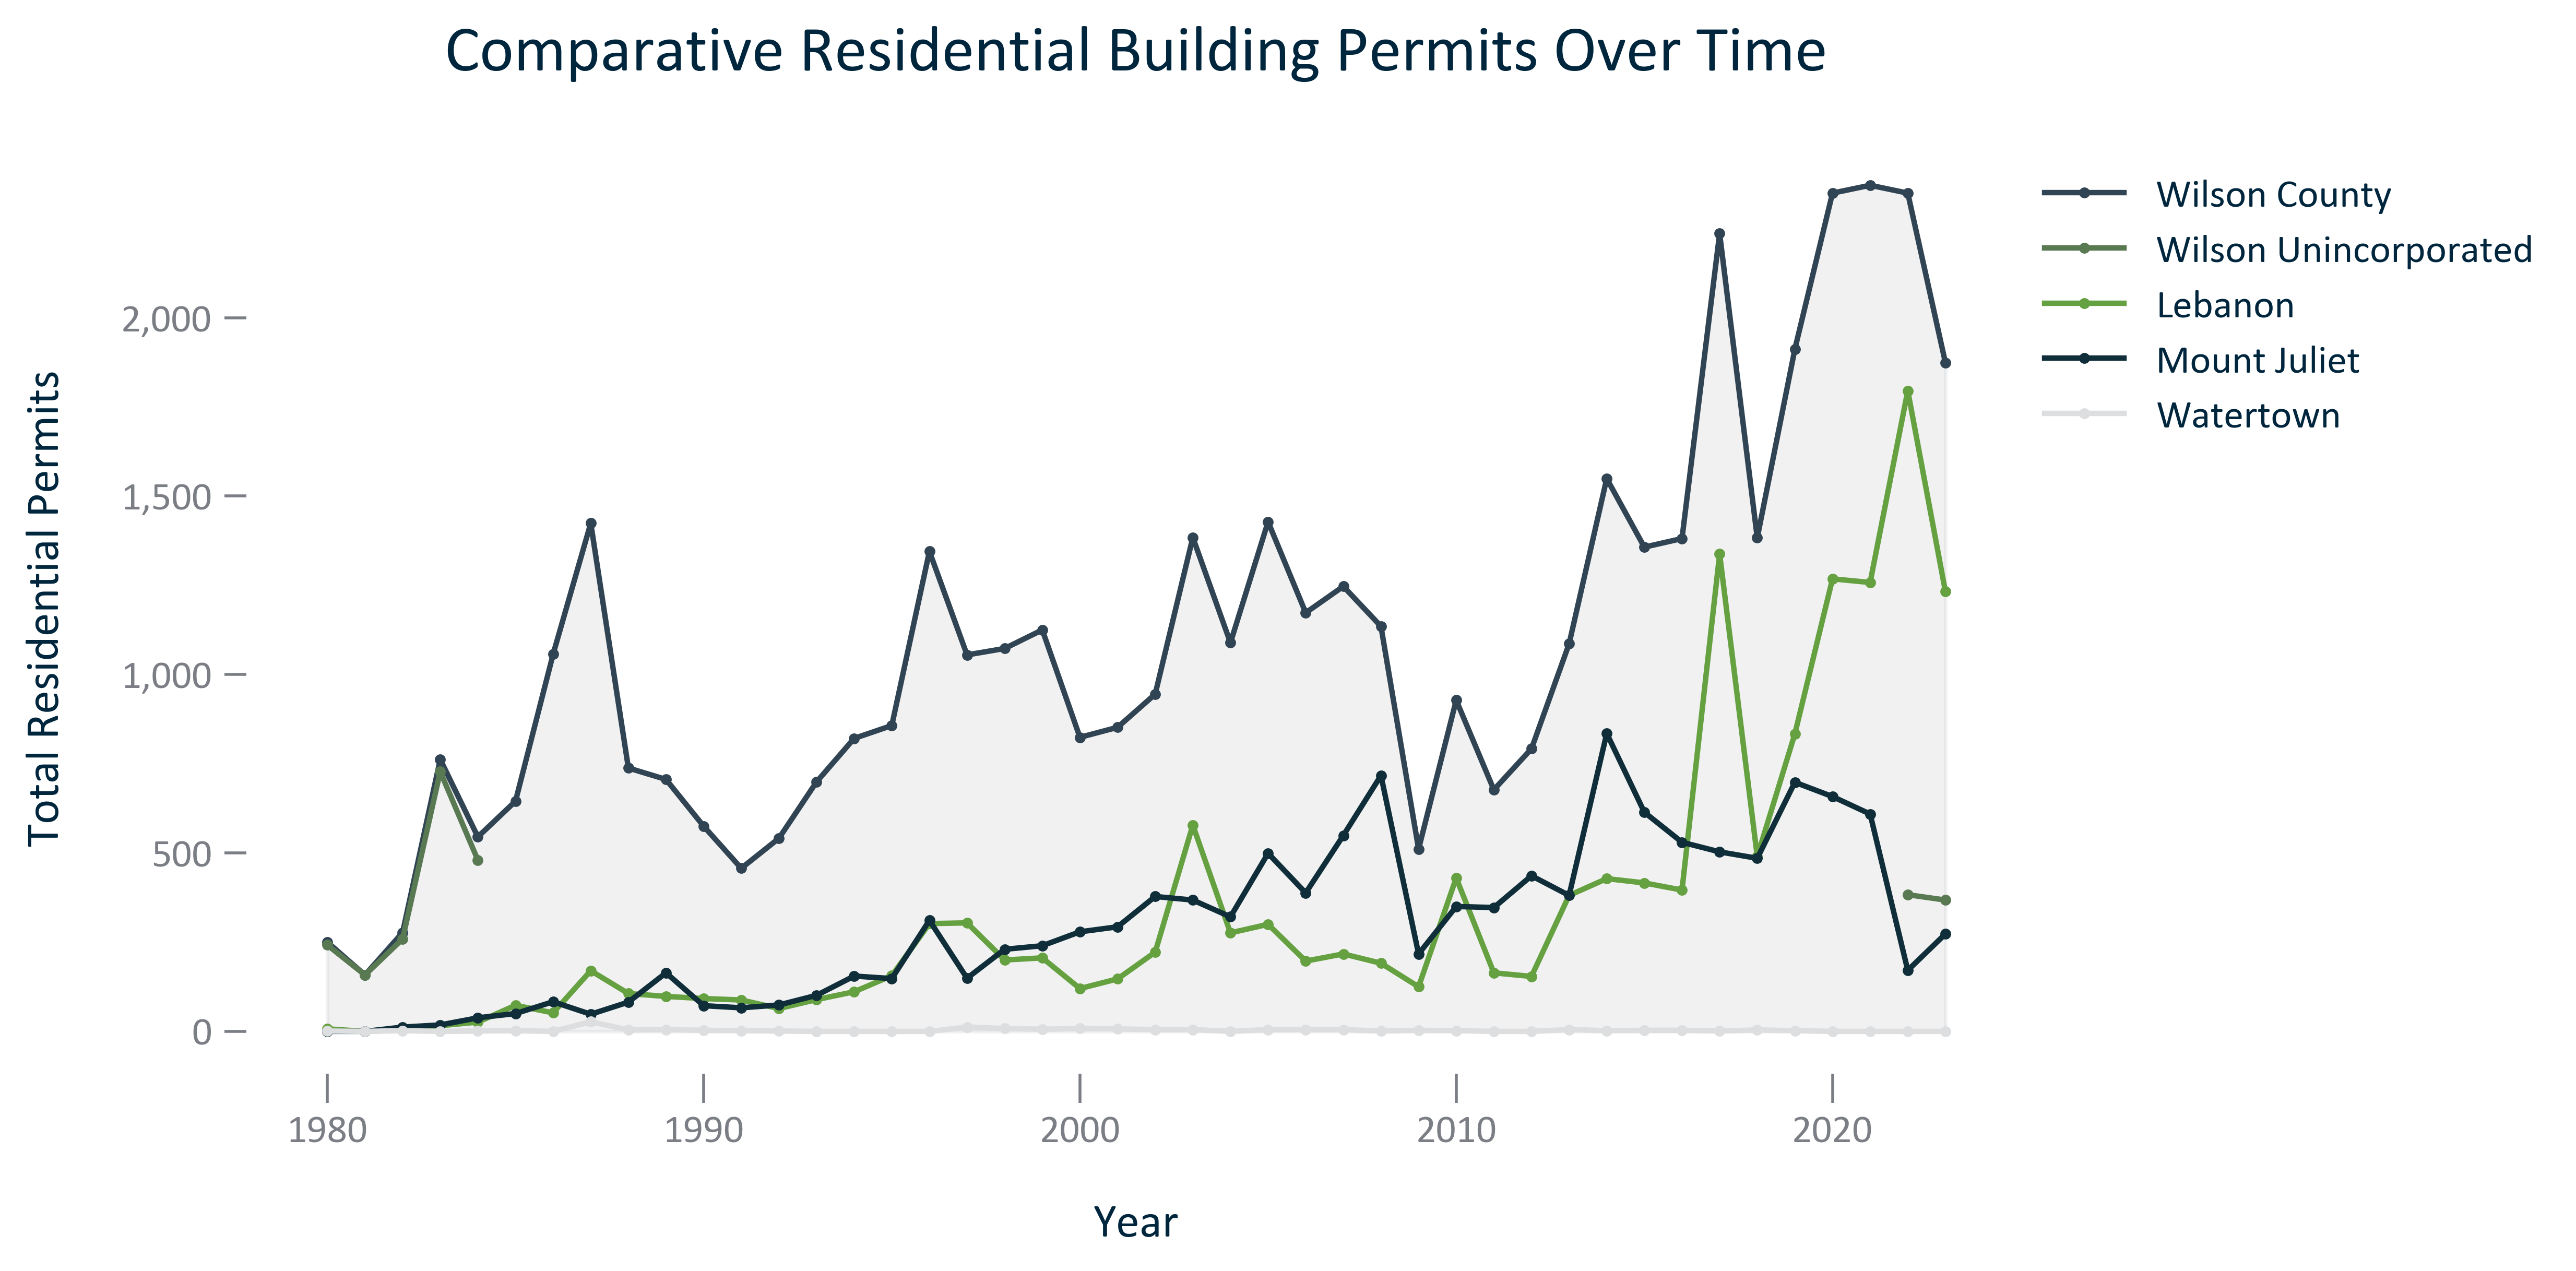

In [19]:
title = 'Comparative Residential Building Permits Over Time' #set title of figure
#set up temporary dataframe
df_temp = hudann
xinput = 'Year'
yinput = 'Units in All Structures'
df_temp0 = df_temp.loc[df_temp['NAME'] == county]
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
df_temp1 = df_temp.loc[df_temp['NAME'] == unincorporated]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'Lebanon']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Mount Juliet']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'Watertown']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, label = linelabel0, markersize = 2)
ax.plot(x1, y1, label = linelabel1, markersize = 2)
ax.plot(x2, y2, label = linelabel2, markersize = 2)
ax.plot(x3, y3, label = linelabel3, markersize = 2)
ax.plot(x4, y4, label = linelabel4, markersize = 2)
ax.set(title = title, xlabel = xinput, ylabel = 'Total Residential Permits')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#Fill under the curve
plt.fill_between(df_temp0['Year'], df_temp0['Units in All Structures'], color= GNRCCOOLGRAY, alpha= 0.1)
#display and save
fig.savefig('../Figures/HOUSEHOLDS_line_geocomparative_HUDresidentialpermits_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/HOUSEHOLDS_line_geocomparative_HUDresidentialpermits_overtime.png', bbox_inches='tight')
with open('../Figures/HOUSEHOLDS_line_geocomparative_HUDresidentialpermits_overtime.txt', 'w') as text_file:
    text_file.write('Citation: HUD SOC Data 1980 - 2023')
plt.show()
plt.close();

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


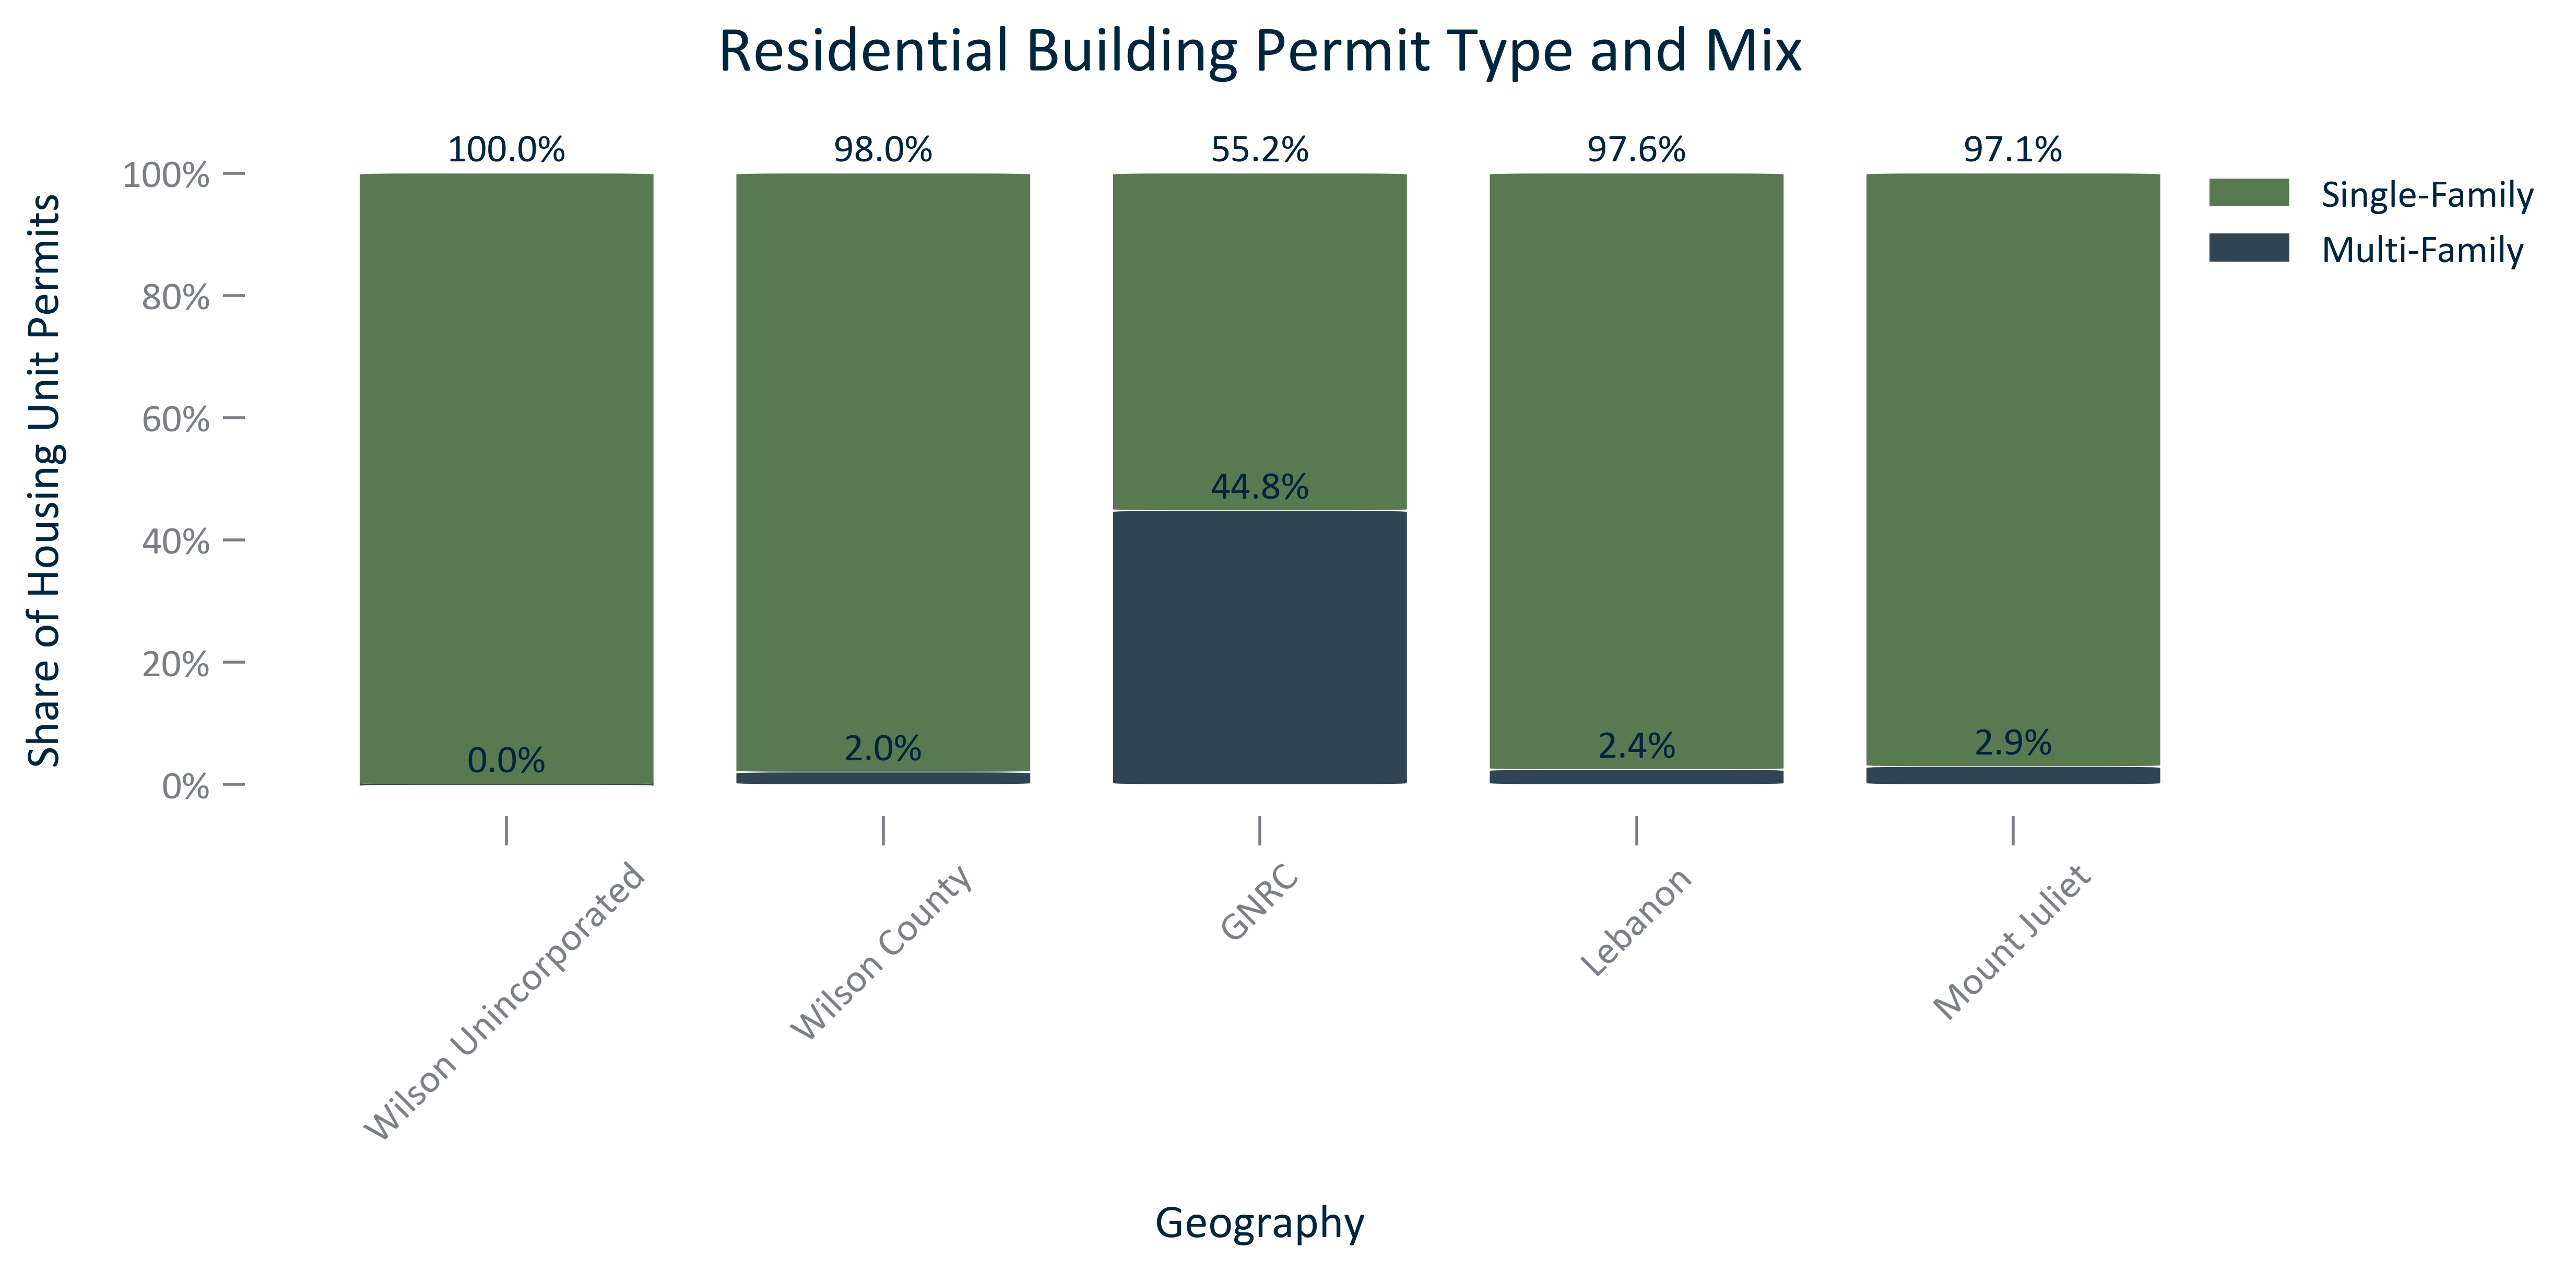

In [22]:
title = 'Residential Building Permit Type and Mix'
#set up temporary dataframe
df_temp = hudcurrent
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(unincorporated)
newcols.remove(county)
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', 'Units in All Multi-Family Structures', 'Units in Single-Family Structures', 'Units in All Structures']]
df_temp['Multi-Family'] = percent(df_temp['Units in All Multi-Family Structures'], df_temp['Units in All Structures'])
df_temp['Single-Family'] = percent(df_temp['Units in Single-Family Structures'], df_temp['Units in All Structures'])
df_temp = df_temp.drop(columns = ['Units in All Multi-Family Structures', 'Units in Single-Family Structures', 'Units in All Structures'])
df_temp = df_temp.loc[df_temp['NAME'] != 'Mitchellville']
df_temp = df_temp.set_index('NAME')
#figure
fig, ax = plt.subplots()
w = 0.9
bottom = np.zeros(len(df_temp))
for i, col in enumerate(df_temp.columns):
    ax.bar(df_temp.index, df_temp[col], w, bottom=bottom, label=col)
    bottom += np.array(df_temp[col])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.set(title = title, xlabel = 'Geography', ylabel = 'Share of Housing Unit Permits') #set the title and axes labels
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#rounded boxes
roundedboxes(boxstyleinput)
#outside legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(0.95, 1), frameon = False)
# For each patch (basically each rectangle within the bar), add a label.
stackedbarlabels(abovestackedbarlabels)
#display and save
#fig.savefig('../Figures/HOUSEHOLDS_stackedbar_geocomparative_HUDresidentialbuildingtypeandmix_current.svg', bbox_inches='tight')
fig.savefig('../Figures/HOUSEHOLDS_stackedbar_geocomparative_HUDresidentialbuildingtypeandmix_current.png', bbox_inches='tight')
with open('../Figures/HOUSEHOLDS_stackedbar_geocomparative_HUDresidentialbuildingtypeandmix_current.txt', 'w') as text_file:
    text_file.write('Citation: HUD SOC Data 2023')
plt.show()
plt.close();

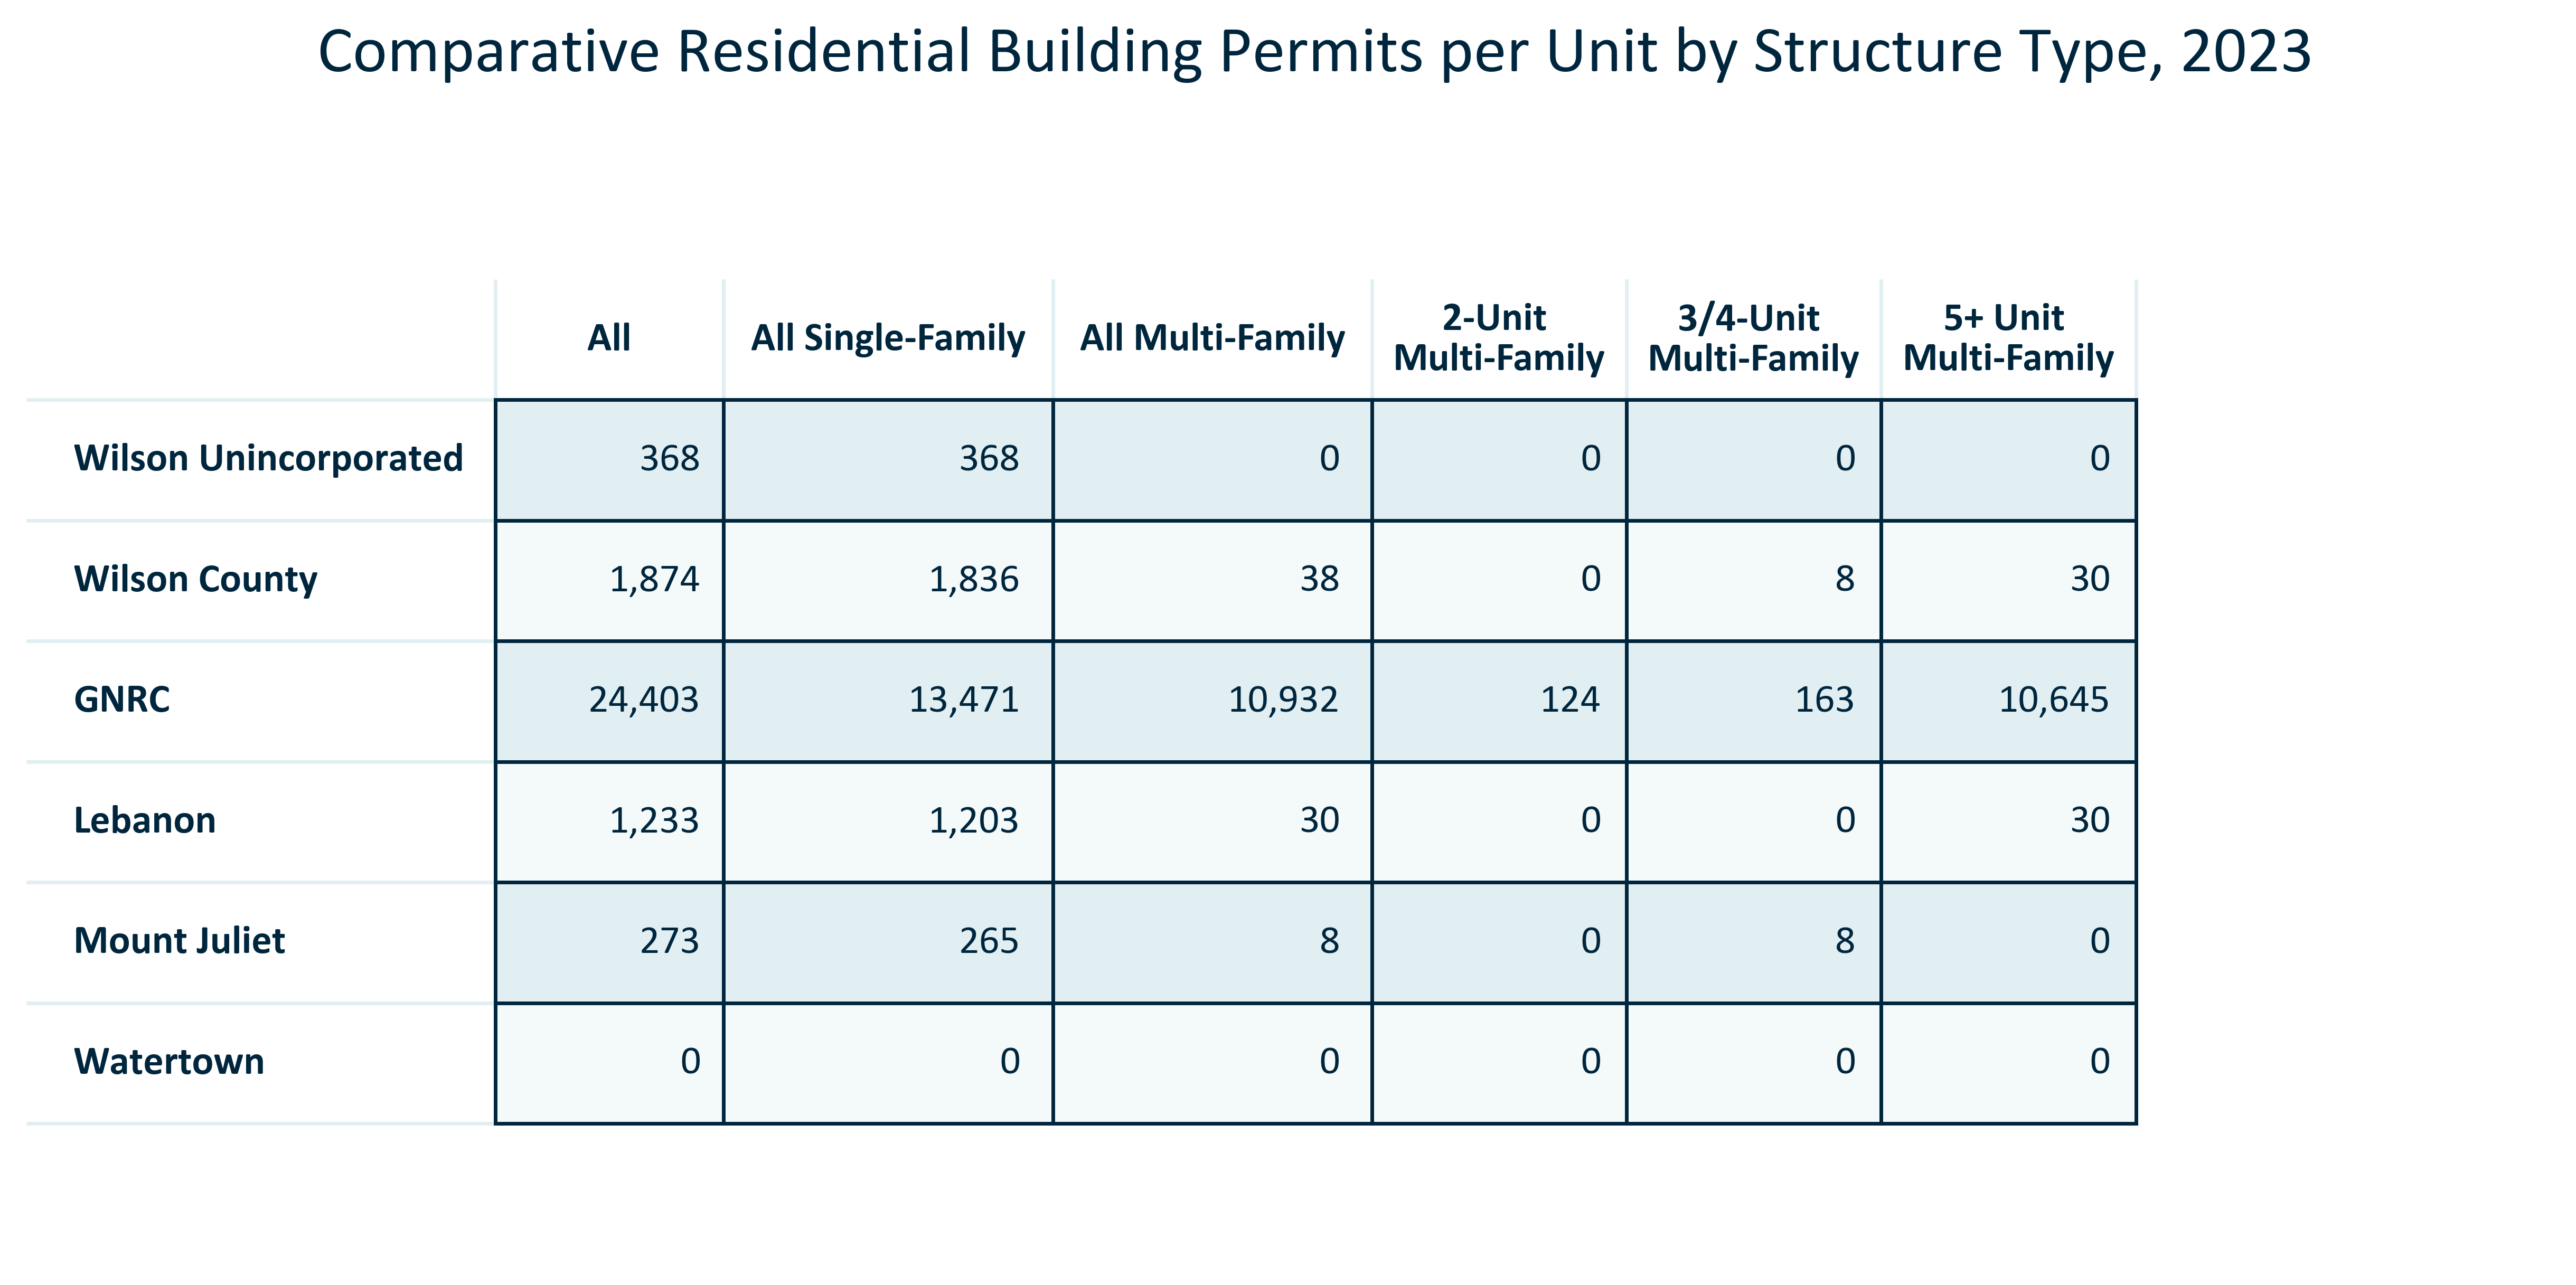

In [23]:
title = 'Comparative Residential Building Permits per Unit by Structure Type, 2023'
df_temp = hudcurrent
df_temp = df_temp.drop(columns = ['GEO_ID'])
#df_temp = df_temp.loc[df_temp['NAME'] != 'Mitchellville']
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(unincorporated)
newcols.remove(county)
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols)
df_temp = df_temp.rename(columns = {'Units in All Structures': '        All        ', 
                                    'Units in Single-Family Structures': 'All Single-Family', 
                                    'Units in All Multi-Family Structures': 'All Multi-Family', 
                                    'Units in 2 Unit Multi-Family Structures': '2-Unit \nMulti-Family', 
                                    'Units in 3 and 4 Unit Multi-Family Structures': '3/4-Unit \nMulti-Family', 
                                    'Units in 5+ Unit Multi-Family Structures': '5+ Unit \nMulti-Family'})
cols = df_temp.columns
df_temp.update(df_temp[cols].applymap(('{:,.0f}'.format)))
#df_temp = df_temp.transpose()
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 1)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/HOUSEHOLDS_table_geocomparative_HUDresidentialpermitperunittype_current.svg', bbox_inches='tight')
fig.savefig('../Figures/HOUSEHOLDS_table_geocomparative_HUDresidentialpermitperunittype_current.png', bbox_inches='tight')
with open('../Figures/HOUSEHOLDS_table_geocomparative_HUDresidentialpermitperunittype_current.txt', 'w') as text_file:
    text_file.write('Citation: HUD SOC Data 2023')
plt.show()
plt.close();

HUD SOC CHECK 1/10/25

In [28]:
zillowhvgeos = ['US', 'Sumner County', 'Cheatham County', 'Dickson County', 'Davidson County', 'Houston County', 
                'Humphreys County', 'Maury County', 'Montgomery County', 'Robertson County', 'Rutherford County', 'Stewart County', 
                'Trousdale County', 'Williamson County', 'Wilson County']
zillowhvgeos = ['US', 'Wilson County', 'Lebanon', 'Mount Juliet']
#Zillow Home Value
conn = sq.connect('../../Pipeline-Zillow/Outputs/Zillow.db')
sql_query = pd.read_sql('SELECT * FROM [Annual_HomeValue]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[zillowhvgeos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
zillowhv = data

In [29]:
zillowrgeos = ['US', 'Wilson County', 'Lebanon', 'Mount Juliet']
#Zillow Rental Rates
conn = sq.connect('../../Pipeline-Zillow/Outputs/Zillow.db')
sql_query = pd.read_sql('SELECT * FROM [Annual_Rent]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[zillowrgeos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
zillowrent = data

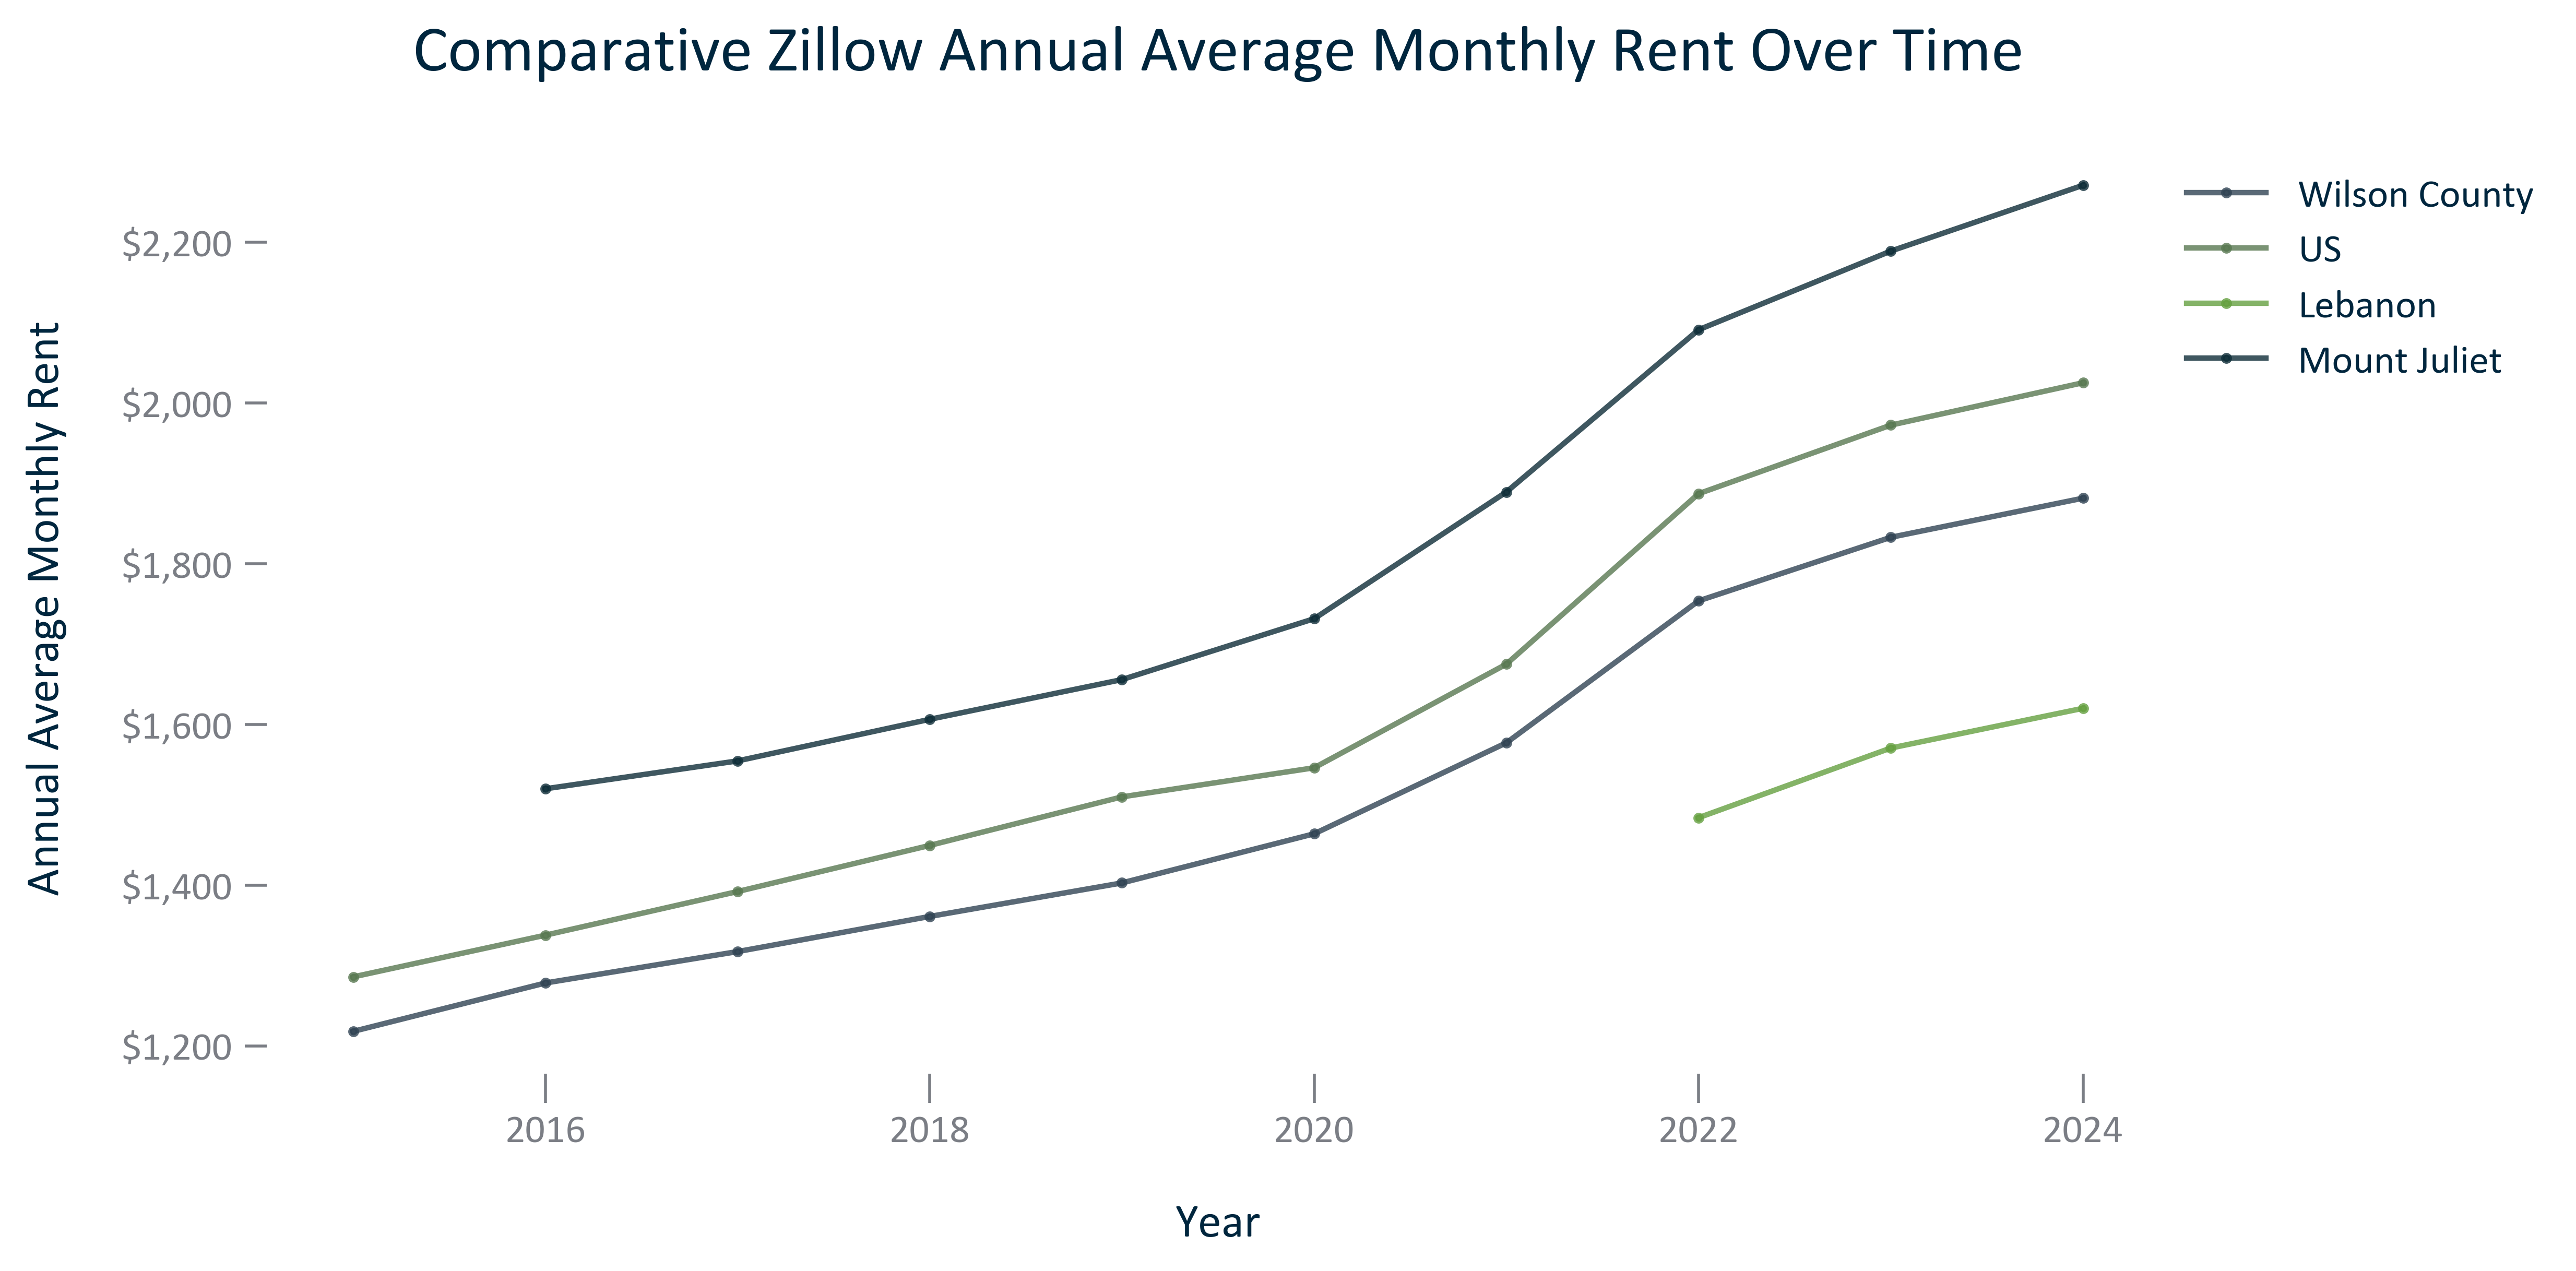

In [30]:
title = 'Comparative Zillow Annual Average Monthly Rent Over Time' #set title of figure
#set up temporary dataframe
df_temp = zillowrent
xinput = 'Year'
yinput = 'Average Rent'
df_temp1 = df_temp.loc[df_temp['NAME'] == county]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'US']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Lebanon']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'Mount Juliet']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x1, y1, alpha = linealpha, label = linelabel1, markersize = 2)
ax.plot(x2, y2, alpha = linealpha, label = linelabel2, markersize = 2)
ax.plot(x3, y3, alpha = linealpha, label = linelabel3, markersize = 2)
ax.plot(x4, y4, alpha = linealpha, label = linelabel4, markersize = 2)
ax.set(title = title, xlabel = xinput, ylabel = 'Annual Average Monthly Rent')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(moneyformat)) #y axis formatting
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/TENURECOST_line_geocomparative_ZILLOWannualaveragerent_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_line_geocomparative_ZILLOWannualaveragerent_overtime.png', bbox_inches='tight')
with open('../Figures/TENURECOST_line_geocomparative_ZILLOWannualaveragerent_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Zillow, 2015-2024')
plt.show()
plt.close();

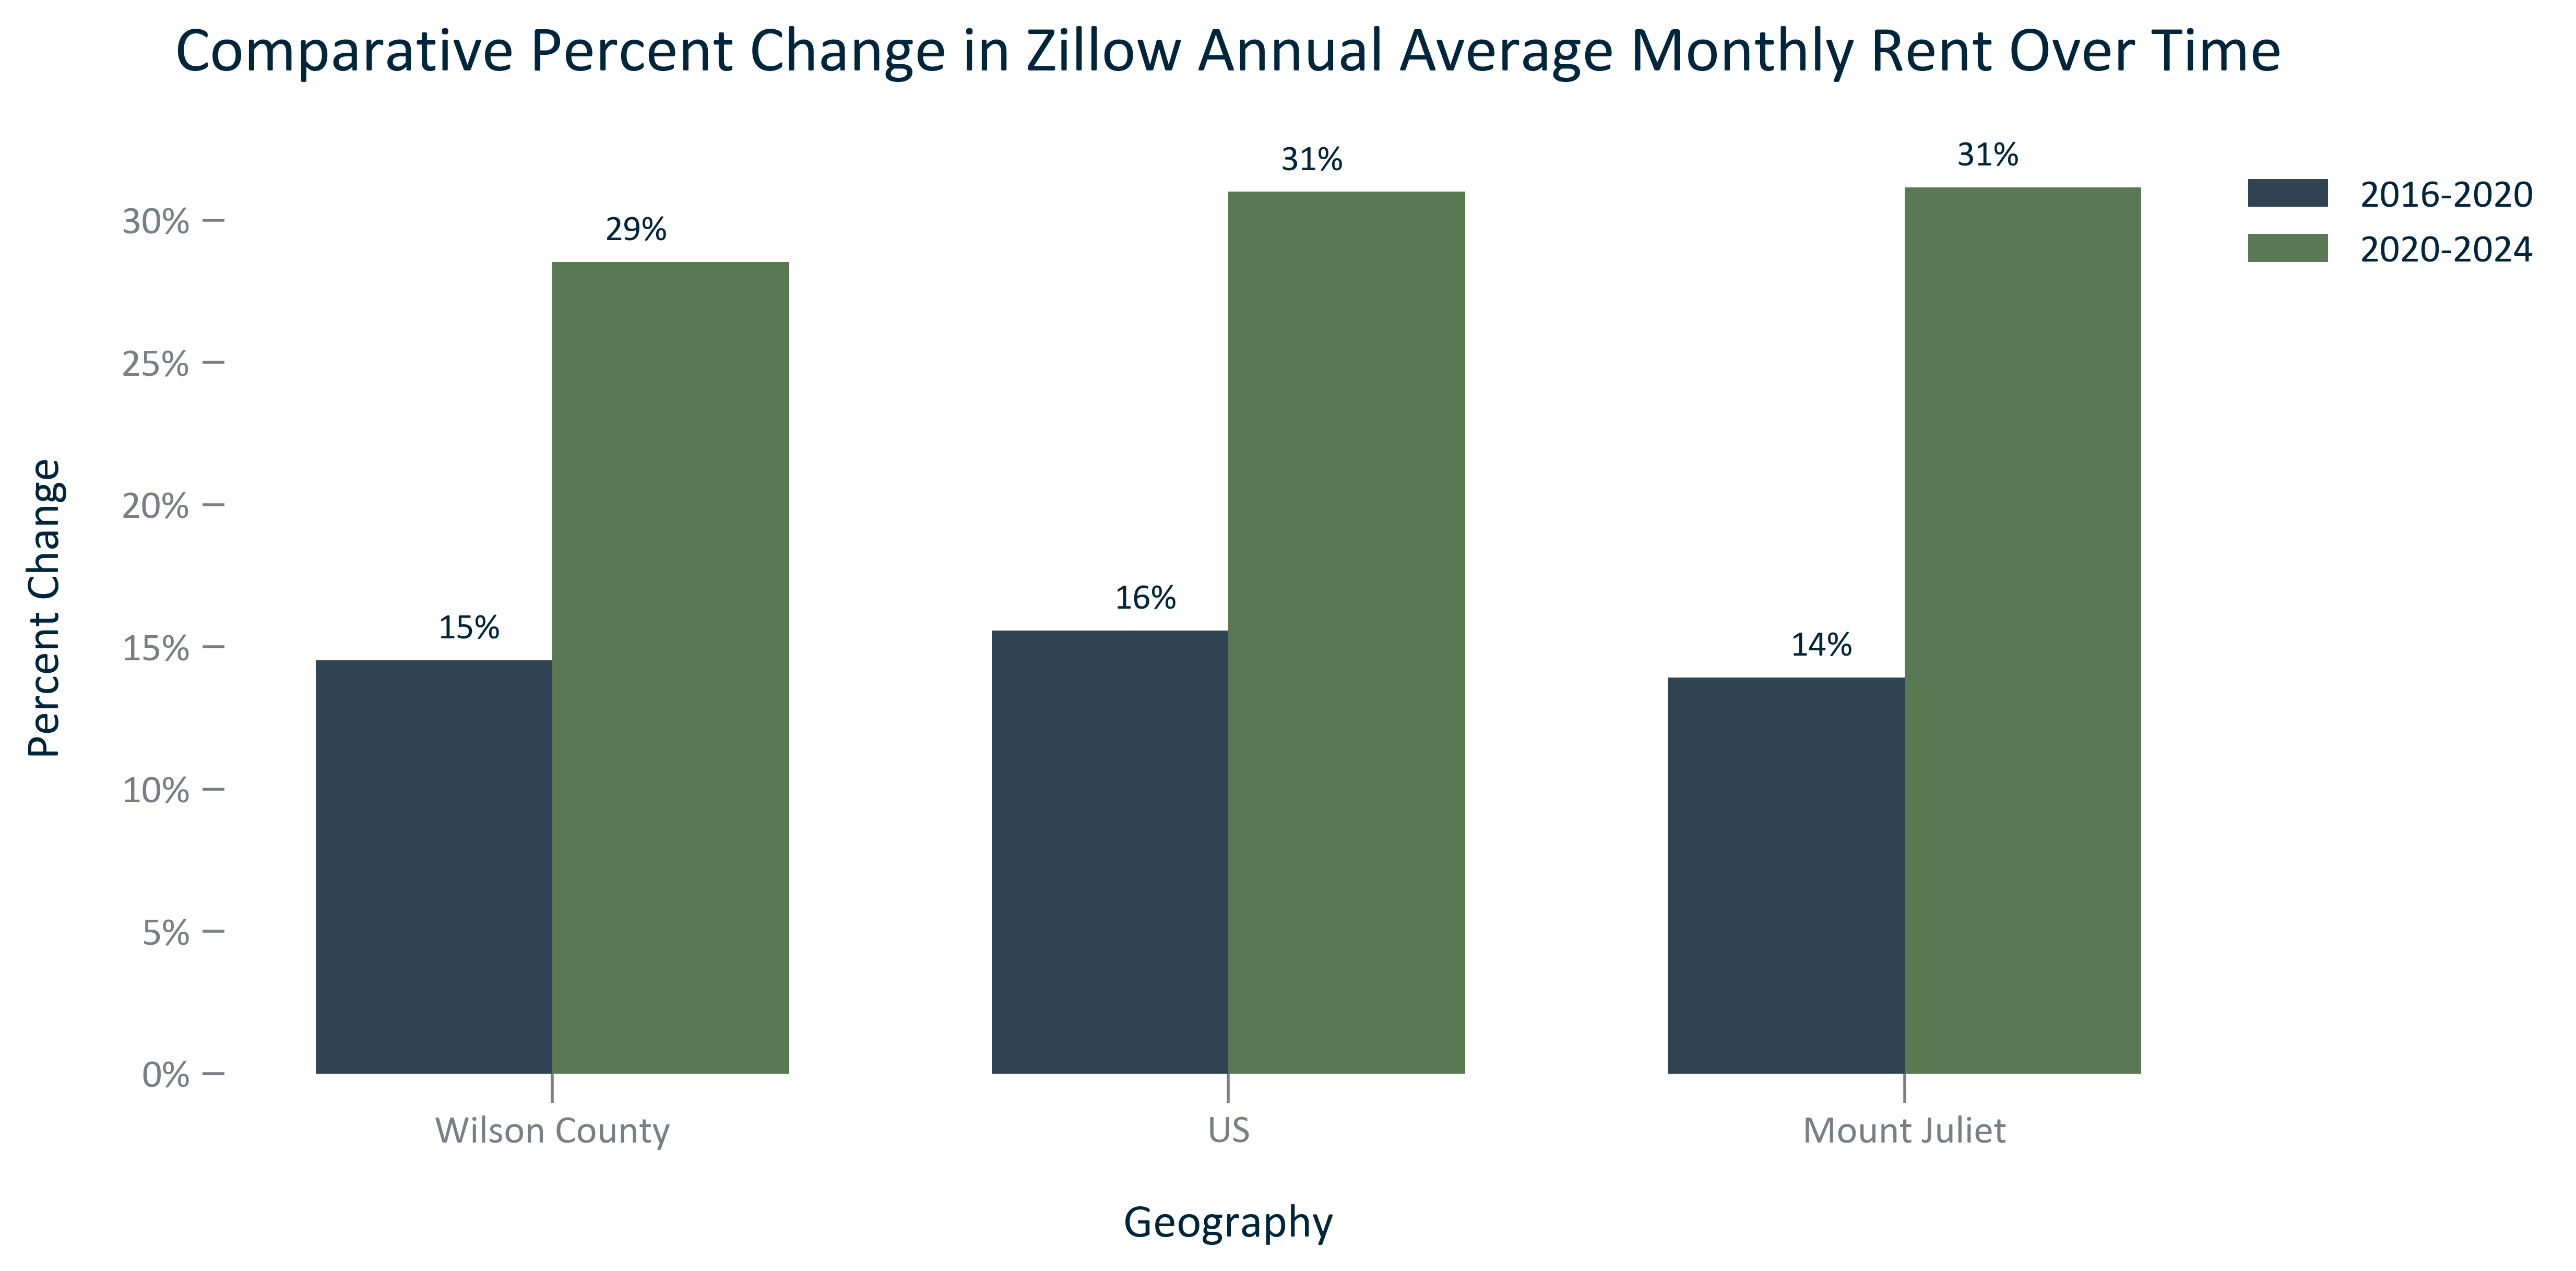

In [31]:
us = 'US'
title = 'Comparative Percent Change in Zillow Annual Average Monthly Rent Over Time'
df_temp = zillowrent.loc[(zillowrent['Year'] == 2016.0)|(zillowrent['Year'] == 2020.0)|(zillowrent['Year'] == 2024.0)]
df_temp = df_temp.loc[(df_temp['NAME'] == 'US')|(df_temp['NAME'] == 'Wilson County')|(df_temp['NAME'] == 'Mount Juliet')]
df_temp = df_temp[['NAME', 'Year', 'Average Rent']]
df_temp = df_temp.set_index(['Year', 'NAME'])
df_temp = df_temp.unstack(['Year']).reset_index(drop = False).sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols.remove(us)
newcols = [us] + newcols
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols)
df_temp.columns = ['{} {}'.format(t, v) for v,t in df_temp.columns]
df_temp['2016-2020'] = percentchange(df_temp['2020.0 Average Rent'], df_temp['2016.0 Average Rent'])
df_temp['2020-2024'] = percentchange(df_temp['2024.0 Average Rent'], df_temp['2020.0 Average Rent'])
df_temp = df_temp[['2016-2020', '2020-2024']]
xlabel = 'Geography'
ylabel = 'Percent Change'
#set up figure
xpos = np.arange(len(df_temp.index))
x = df_temp.index
y1 = df_temp['2016-2020']
y2 = df_temp['2020-2024']
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(xpos-width/2, y1, width, label = '2016-2020')
bar2 = ax.bar(xpos+width/2, y2, width, label = '2020-2024')
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major')#, rotation = 45)
ax.set_xticks(xpos)
ax.set_xticklabels(x)
#outside legend
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left', frameon = False)#, prop = {'size':9})
#data labels
doubledatalabels(-23, 6, 23, 6, "{:,.0f}%", SMALLER_SIZE)
#display and save
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualaveragerent_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualaveragerent_overtime.png', bbox_inches='tight')
with open('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualaveragerent_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Zillow, 2016-2024')
plt.show()
plt.close();

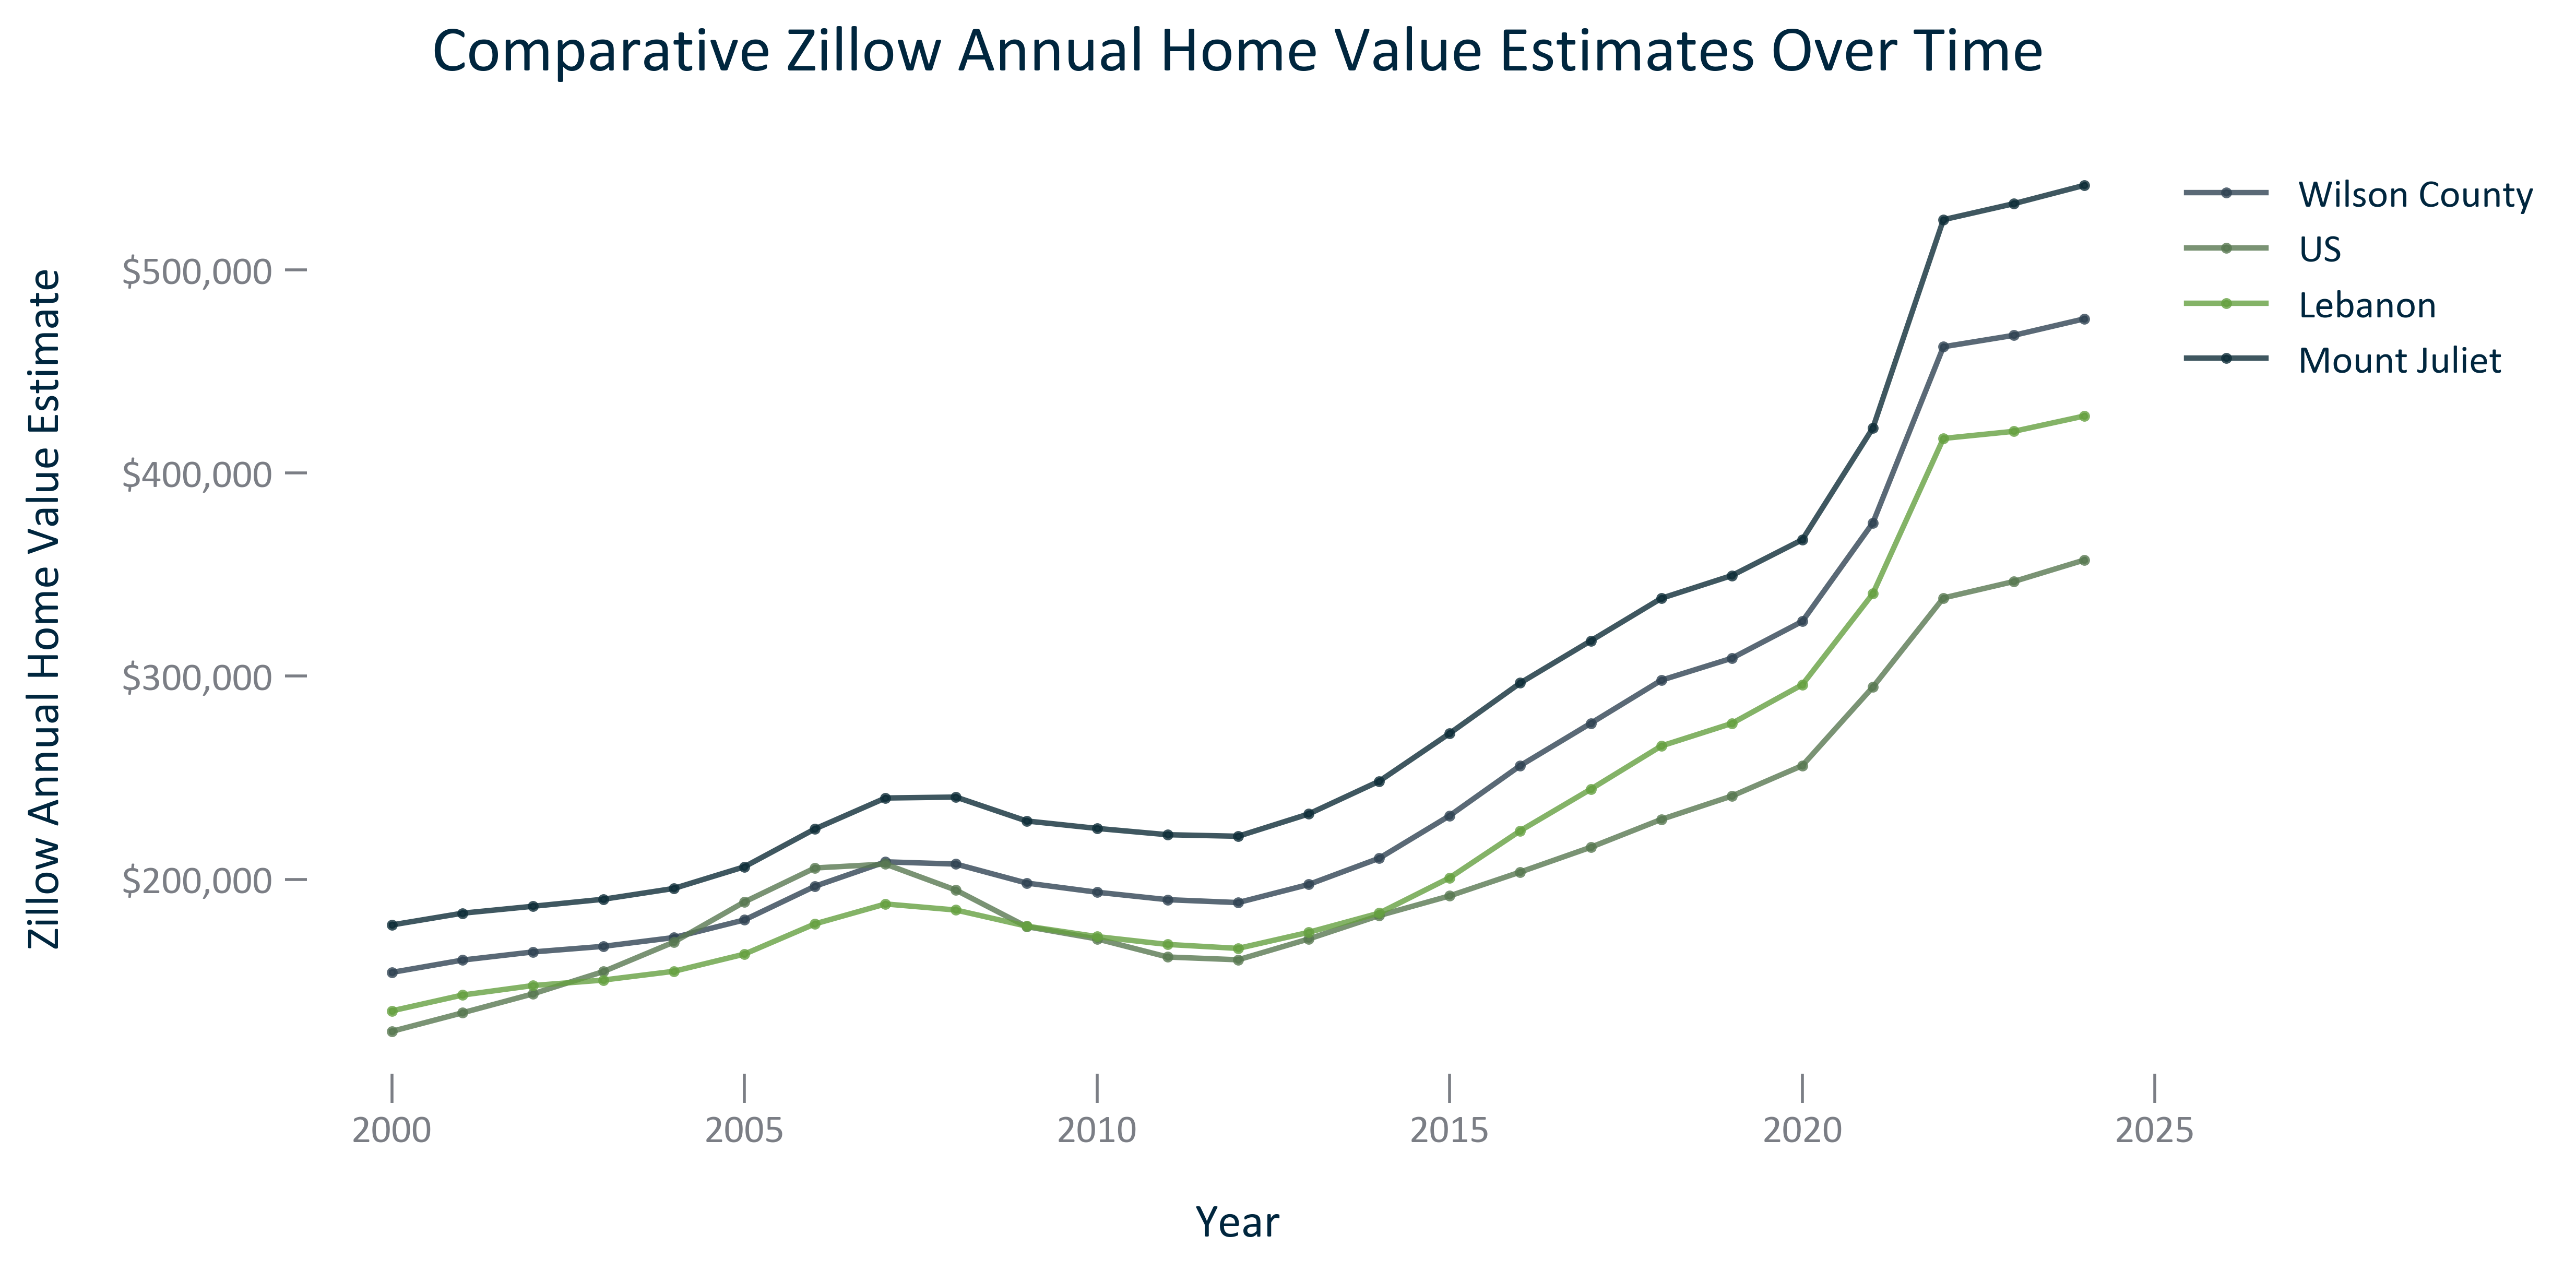

In [32]:
title = 'Comparative Zillow Annual Home Value Estimates Over Time'
#set up temporary dataframe
df_temp = zillowhv
xinput = 'Year'
yinput = 'Home Value'
df_temp1 = df_temp.loc[df_temp['NAME'] == county]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'US']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Lebanon']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'Mount Juliet']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x1, y1, alpha = linealpha, label = linelabel1, markersize = 2)
ax.plot(x2, y2, alpha = linealpha, label = linelabel2, markersize = 2)
ax.plot(x3, y3, alpha = linealpha, label = linelabel3, markersize = 2)
ax.plot(x4, y4, alpha = linealpha, label = linelabel4, markersize = 2)
ax.set(title = title, xlabel = xinput, ylabel = 'Zillow Annual Home Value Estimate')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(moneyformat)) #y axis formatting
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')#, prop={'size': 8})
#display and save
fig.savefig('../Figures/TENURECOST_line_geocomparative_ZILLOWannualhomevalueestimates_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_line_geocomparative_ZILLOWannualhomevalueestimates_overtime.png', bbox_inches='tight')
with open('../Figures/TENURECOST_line_geocomparative_ZILLOWannualhomevalueestimates_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Zillow, 2000-2024')
plt.show()
plt.close();

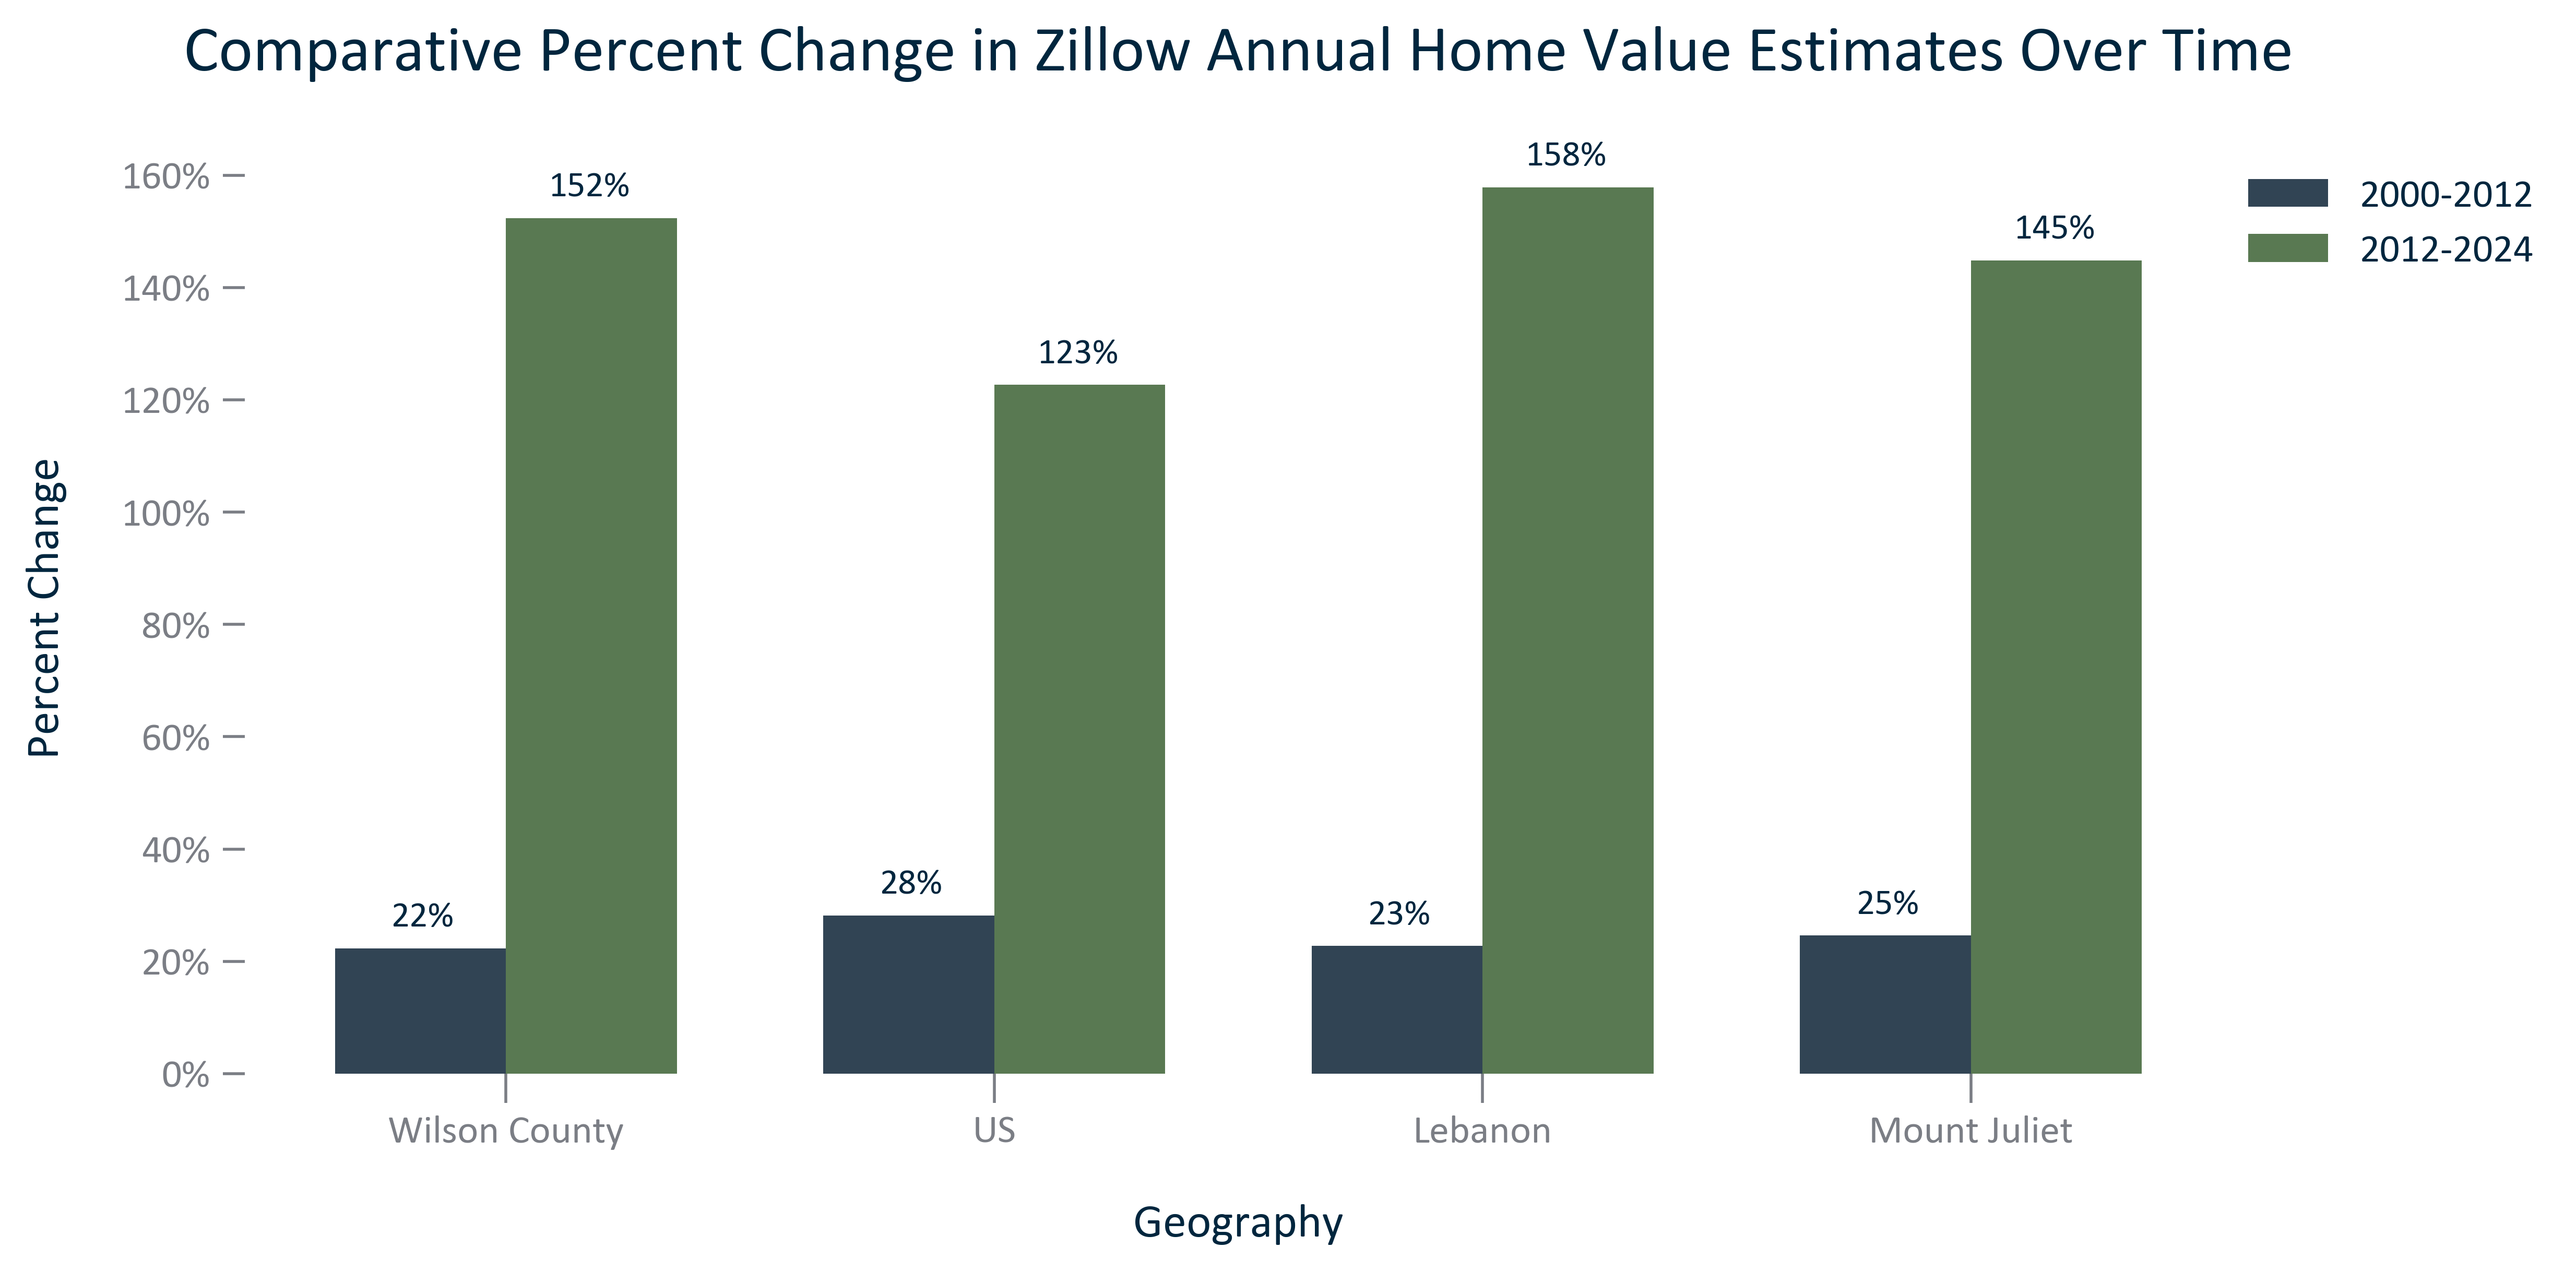

In [33]:
title = 'Comparative Percent Change in Zillow Annual Home Value Estimates Over Time'
df_temp = zillowhv.loc[(zillowhv['Year'] == 2000.0)|(zillowhv['Year'] == 2012.0)|(zillowhv['Year'] == 2024.0)]
df_temp = df_temp.loc[(df_temp['NAME'] == 'US')|(df_temp['NAME'] == 'Wilson County')|(df_temp['NAME'] == 'Mount Juliet')|(df_temp['NAME'] == 'Lebanon')]
df_temp = df_temp[['NAME', 'Year', 'Home Value']].set_index(['Year', 'NAME'])
df_temp = df_temp.unstack(['Year']).reset_index(drop = False).sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols.remove(us)
newcols = [us] + newcols
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols)
df_temp.columns = ['{} {}'.format(t, v) for v,t in df_temp.columns]
df_temp['2000-2012'] = percentchange(df_temp['2012.0 Home Value'], df_temp['2000.0 Home Value'])
df_temp['2012-2024'] = percentchange(df_temp['2024.0 Home Value'], df_temp['2012.0 Home Value'])
df_temp = df_temp[['2000-2012', '2012-2024']]
xlabel = 'Geography'
ylabel = 'Percent Change'
#set up figure
xpos = np.arange(len(df_temp.index))
x = df_temp.index
y1 = df_temp['2000-2012']
y2 = df_temp['2012-2024']
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(xpos-width/2, y1, width, label = '2000-2012')
bar2 = ax.bar(xpos+width/2, y2, width, label = '2012-2024')

ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major')#, rotation = 45)
ax.set_xticks(xpos)
ax.set_xticklabels(x)
#outside legend
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left', frameon = False)#, prop = {'size':9})
#data labels
doubledatalabels(-23, 6, 23, 6, "{:,.0f}%", SMALLER_SIZE)
# #display and save
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualhomevalueestimates_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualhomevalueestimates_overtime.png', bbox_inches='tight')
with open('../Figures/TENURECOST_clusterbar_geocomparative_ZILLOWpercentchangeannualhomevalueestimates_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Zillow, 2000-2024')
plt.show()
plt.close();

ZILLOW CHECK 1/10/2025

In [65]:
geos = ['Wilson County', 'Wilson Unincorporated', 'Lebanon', 'Mount Juliet', 'Watertown']
#Center for Neighborhood Technology
conn = sq.connect('../../Pipeline-Center-for-Neighborhood-Technology/Outputs/CNT.db')
sql_query = pd.read_sql('SELECT * FROM [HT_2020]', conn)
data = pd.DataFrame(sql_query)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
#cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
cnt = data

In [66]:
title = 'Comparative Housing and Transportation Costs as Percent of Household Income'
df_temp = cnt.loc[cnt['Year'] == 2020.0]
df_temp = df_temp[['NAME', 'Households','Transportation Cost as % of Median Household Income', 
                   'Housing Cost as % of Median Household Income']]
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
df_temp

Households  Transportation Cost as % of Median Household Income  Housing Cost as % of Median Household Income
NAME                                                                                                                                
Lebanon                   15014.0                                          21.914346                                       22.926936
Mount Juliet              14446.0                                          13.615753                                       17.889068
Watertown                   645.0                                          26.946844                                       23.804508
Wilson County             55037.0                                          17.025106                                       20.160515
Wilson Unincorporated     24932.0                                          17.144113                                       20.483967

In [67]:
cnt

NAME  Households  Annual Median Household Income  Monthly Median Household Income  Annual Transportation Cost  \
0          Wilson County     55037.0                    89462.000000                      7455.166667                15231.000000   
1  Wilson Unincorporated     24932.0                    95038.308439                      7919.859037                16293.475333   
2                Lebanon     15014.0                    63698.000000                      5308.166667                13959.000000   
3           Mount Juliet     14446.0                   108066.000000                      9005.500000                14714.000000   
4              Watertown       645.0                    56964.000000                      4747.000000                15350.000000   

   Monthly Transportation Cost  Annual Housing Cost  Monthly Housing Cost  Annual Housing and Transportation Cost  \
0                  1269.250000         18036.000000            1503.00000                            33267.000000   
1                  1357.789611         19467.616076            1622.30134                            35761.091409   
2                  1163.250000         14604.000000            1217.00000                            28563.000000   
3                  1226.166667         19332.000000            1611.00000                            34046.000000   
4                  1279.166667         13560.000000            1130.00000                            28910.000000   

   Monthly Housing and Transportation Cost  Transportation Cost as % of Median Household Income  Housing Cost as % of Median Household Income  \
0                              2772.250000                                          17.025106                                       20.160515   
1                              2980.090951                                          17.144113                                       20.483967   
2                              2380.250000                                          21.914346                                       22.926936   
3                              2837.166667                                          13.615753                                       17.889068   
4                              2409.166667                                          26.946844                                       23.804508   

   Housing and Transportation Cost as % of Median Household Income  Difference Annual Median Household Income and Total Annual Costs  \
0                                          37.185621                                                      56195.00000                  
1                                          37.628081                                                      59277.21703                  
2                                          44.841282                                                      35135.00000                  
3                                          31.504821                                                      74020.00000                  
4                                          50.751352                                                      28054.00000                  

   Difference Monthly Median Household Income and Total Monthly Costs    Year  
0                                        4682.916667                   2020.0  
1                                        4939.768086                   2020.0  
2                                        2927.916667                   2020.0  
3                                        6168.333333                   2020.0  
4                                        2337.833333                   2020.0

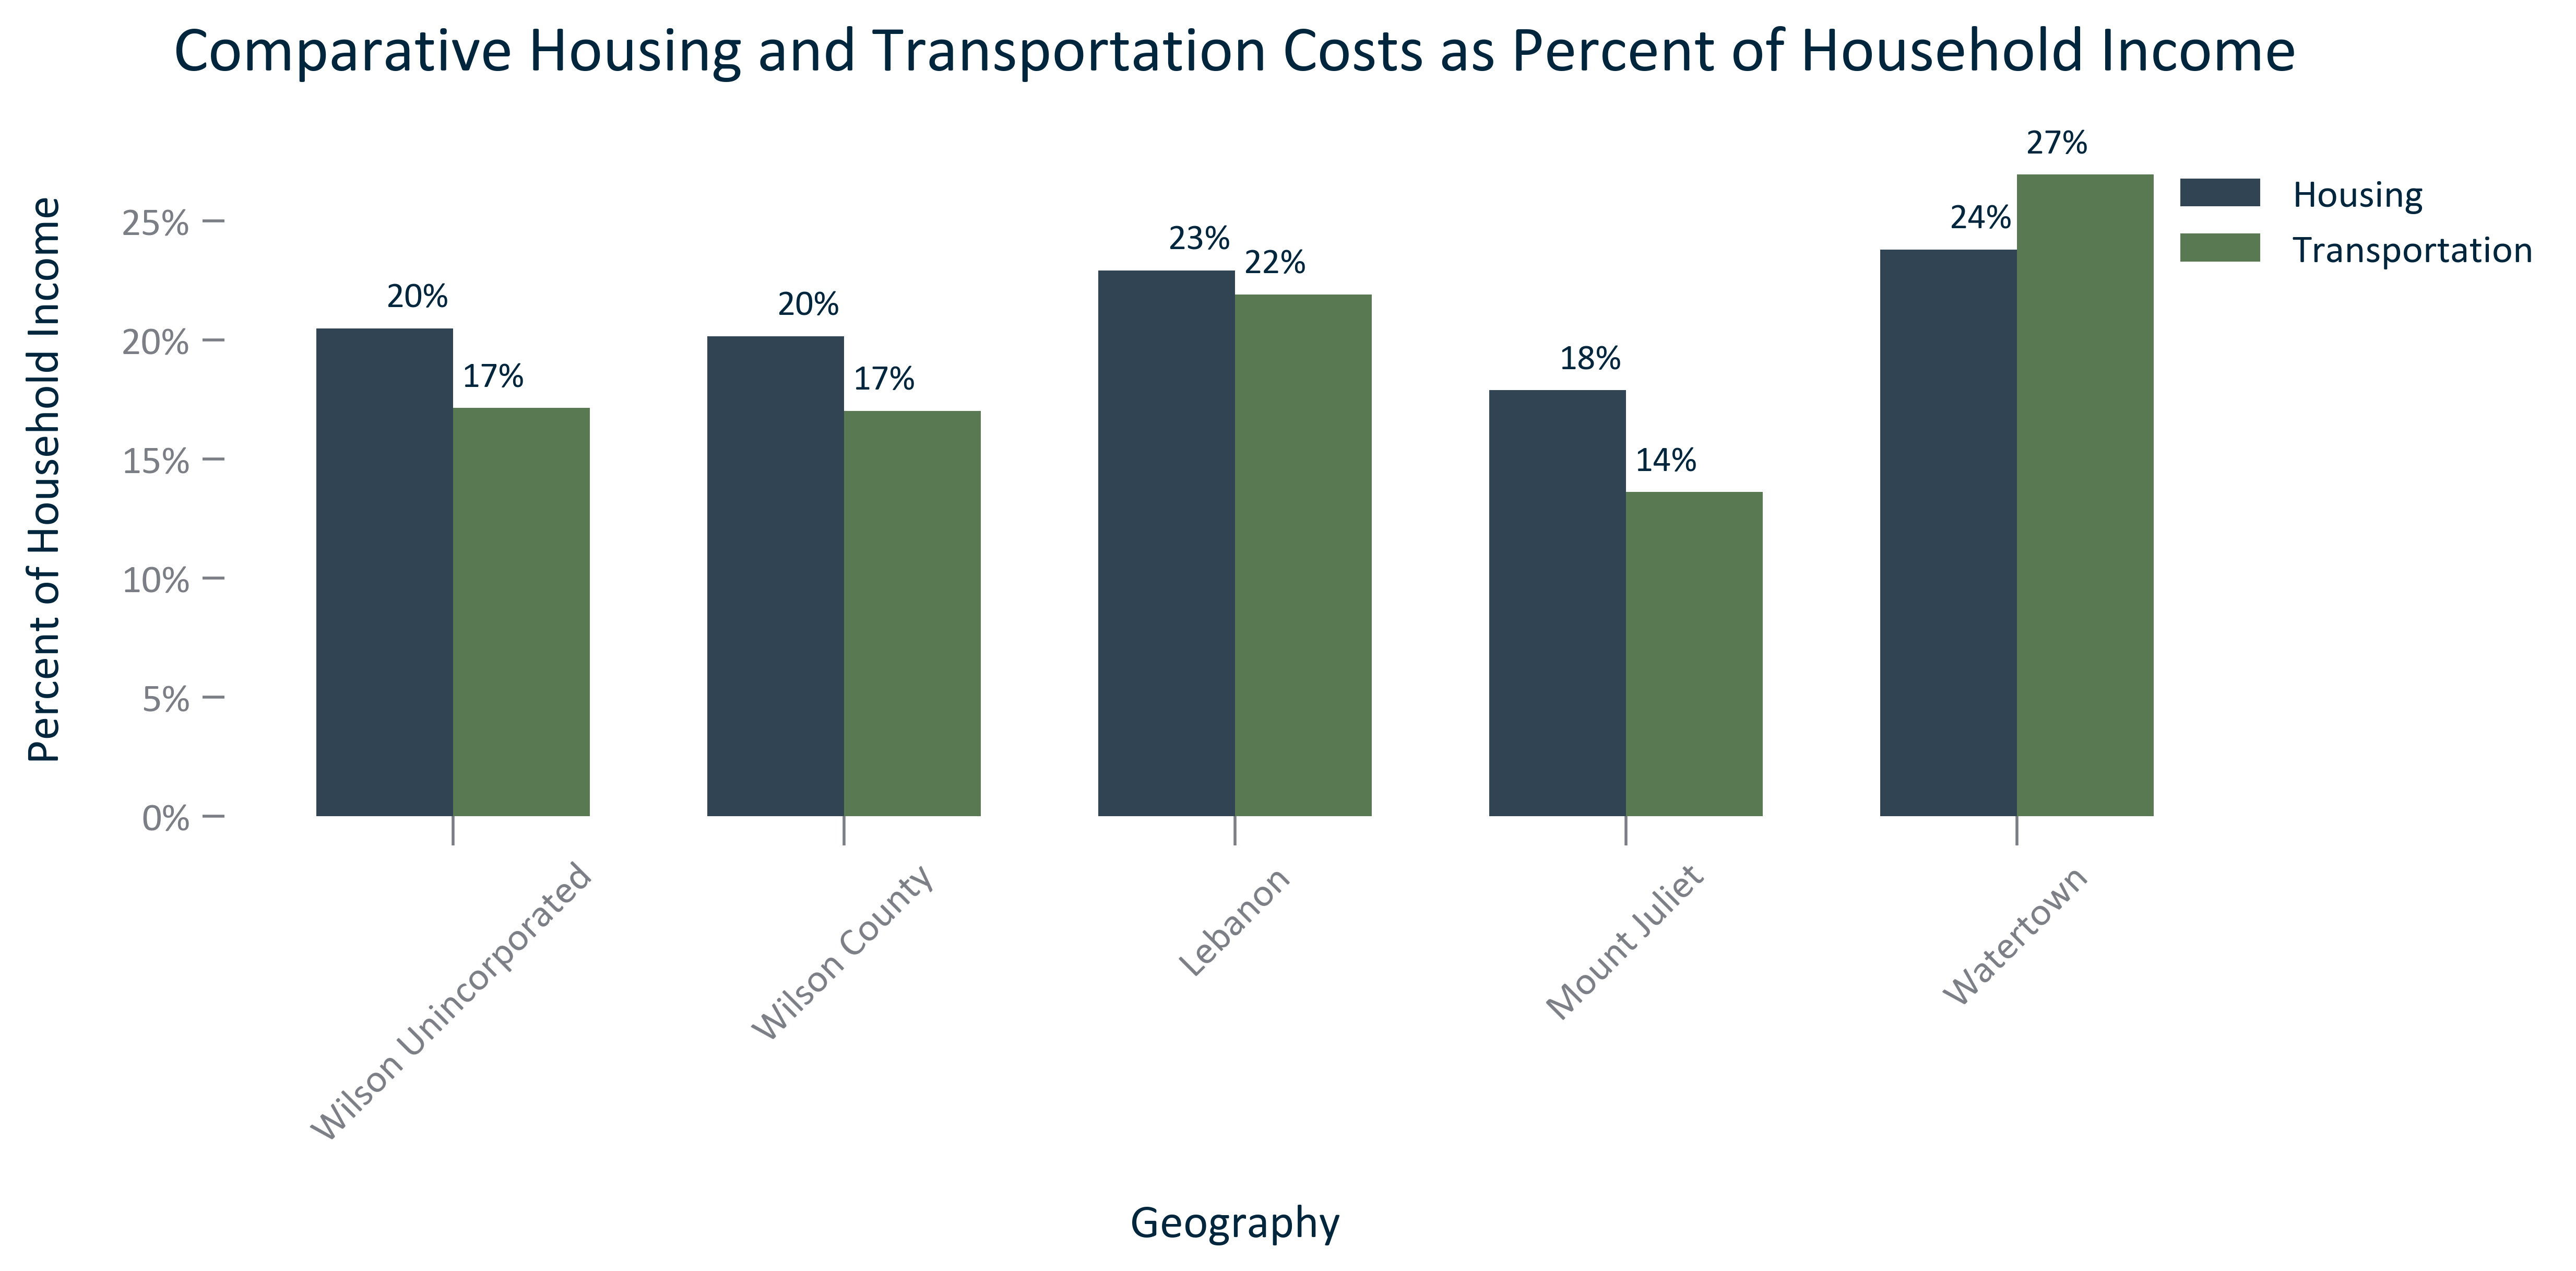

In [68]:
title = 'Comparative Housing and Transportation Costs as Percent of Household Income'
df_temp = cnt.loc[cnt['Year'] == 2020.0]
df_temp = df_temp[['NAME', 'Households','Transportation Cost as % of Median Household Income', 
                   'Housing Cost as % of Median Household Income']]
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols.remove(unincorporated)
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp.rename(columns = {'Housing Cost as % of Median Household Income': 'Housing', 
                                    'Transportation Cost as % of Median Household Income': 'Transportation'}).set_index('NAME')
xlabel = 'Geography'
ylabel = 'Percent of Household Income'
#set up figure
xpos = np.arange(len(df_temp.index))
x = df_temp.index
y1 = df_temp['Housing']
y2 = df_temp['Transportation']
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(xpos-width/2, y1, width, label = 'Housing')
bar2 = ax.bar(xpos+width/2, y2, width, label = 'Transportation')
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
ax.set_xticks(xpos)
ax.set_xticklabels(x)
#outside legend
ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', frameon = False)#, prop = {'size':9})
#data labels
doubledatalabels(-10, 6, 11, 6, "{:,.0f}%", SMALLER_SIZE)
#display and save
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_CNThtpercentofincome_current.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_clusterbar_geocomparative_CNThtpercentofincome_current.png', bbox_inches='tight')
with open('../Figures/TENURECOST_clusterbar_geocomparative_CNThtpercentofincome_current.txt', 'w') as text_file:
    text_file.write('Citation: Center for Neighborhood Technology, 2020 Housing and Transportation Index')
plt.show()
plt.close();

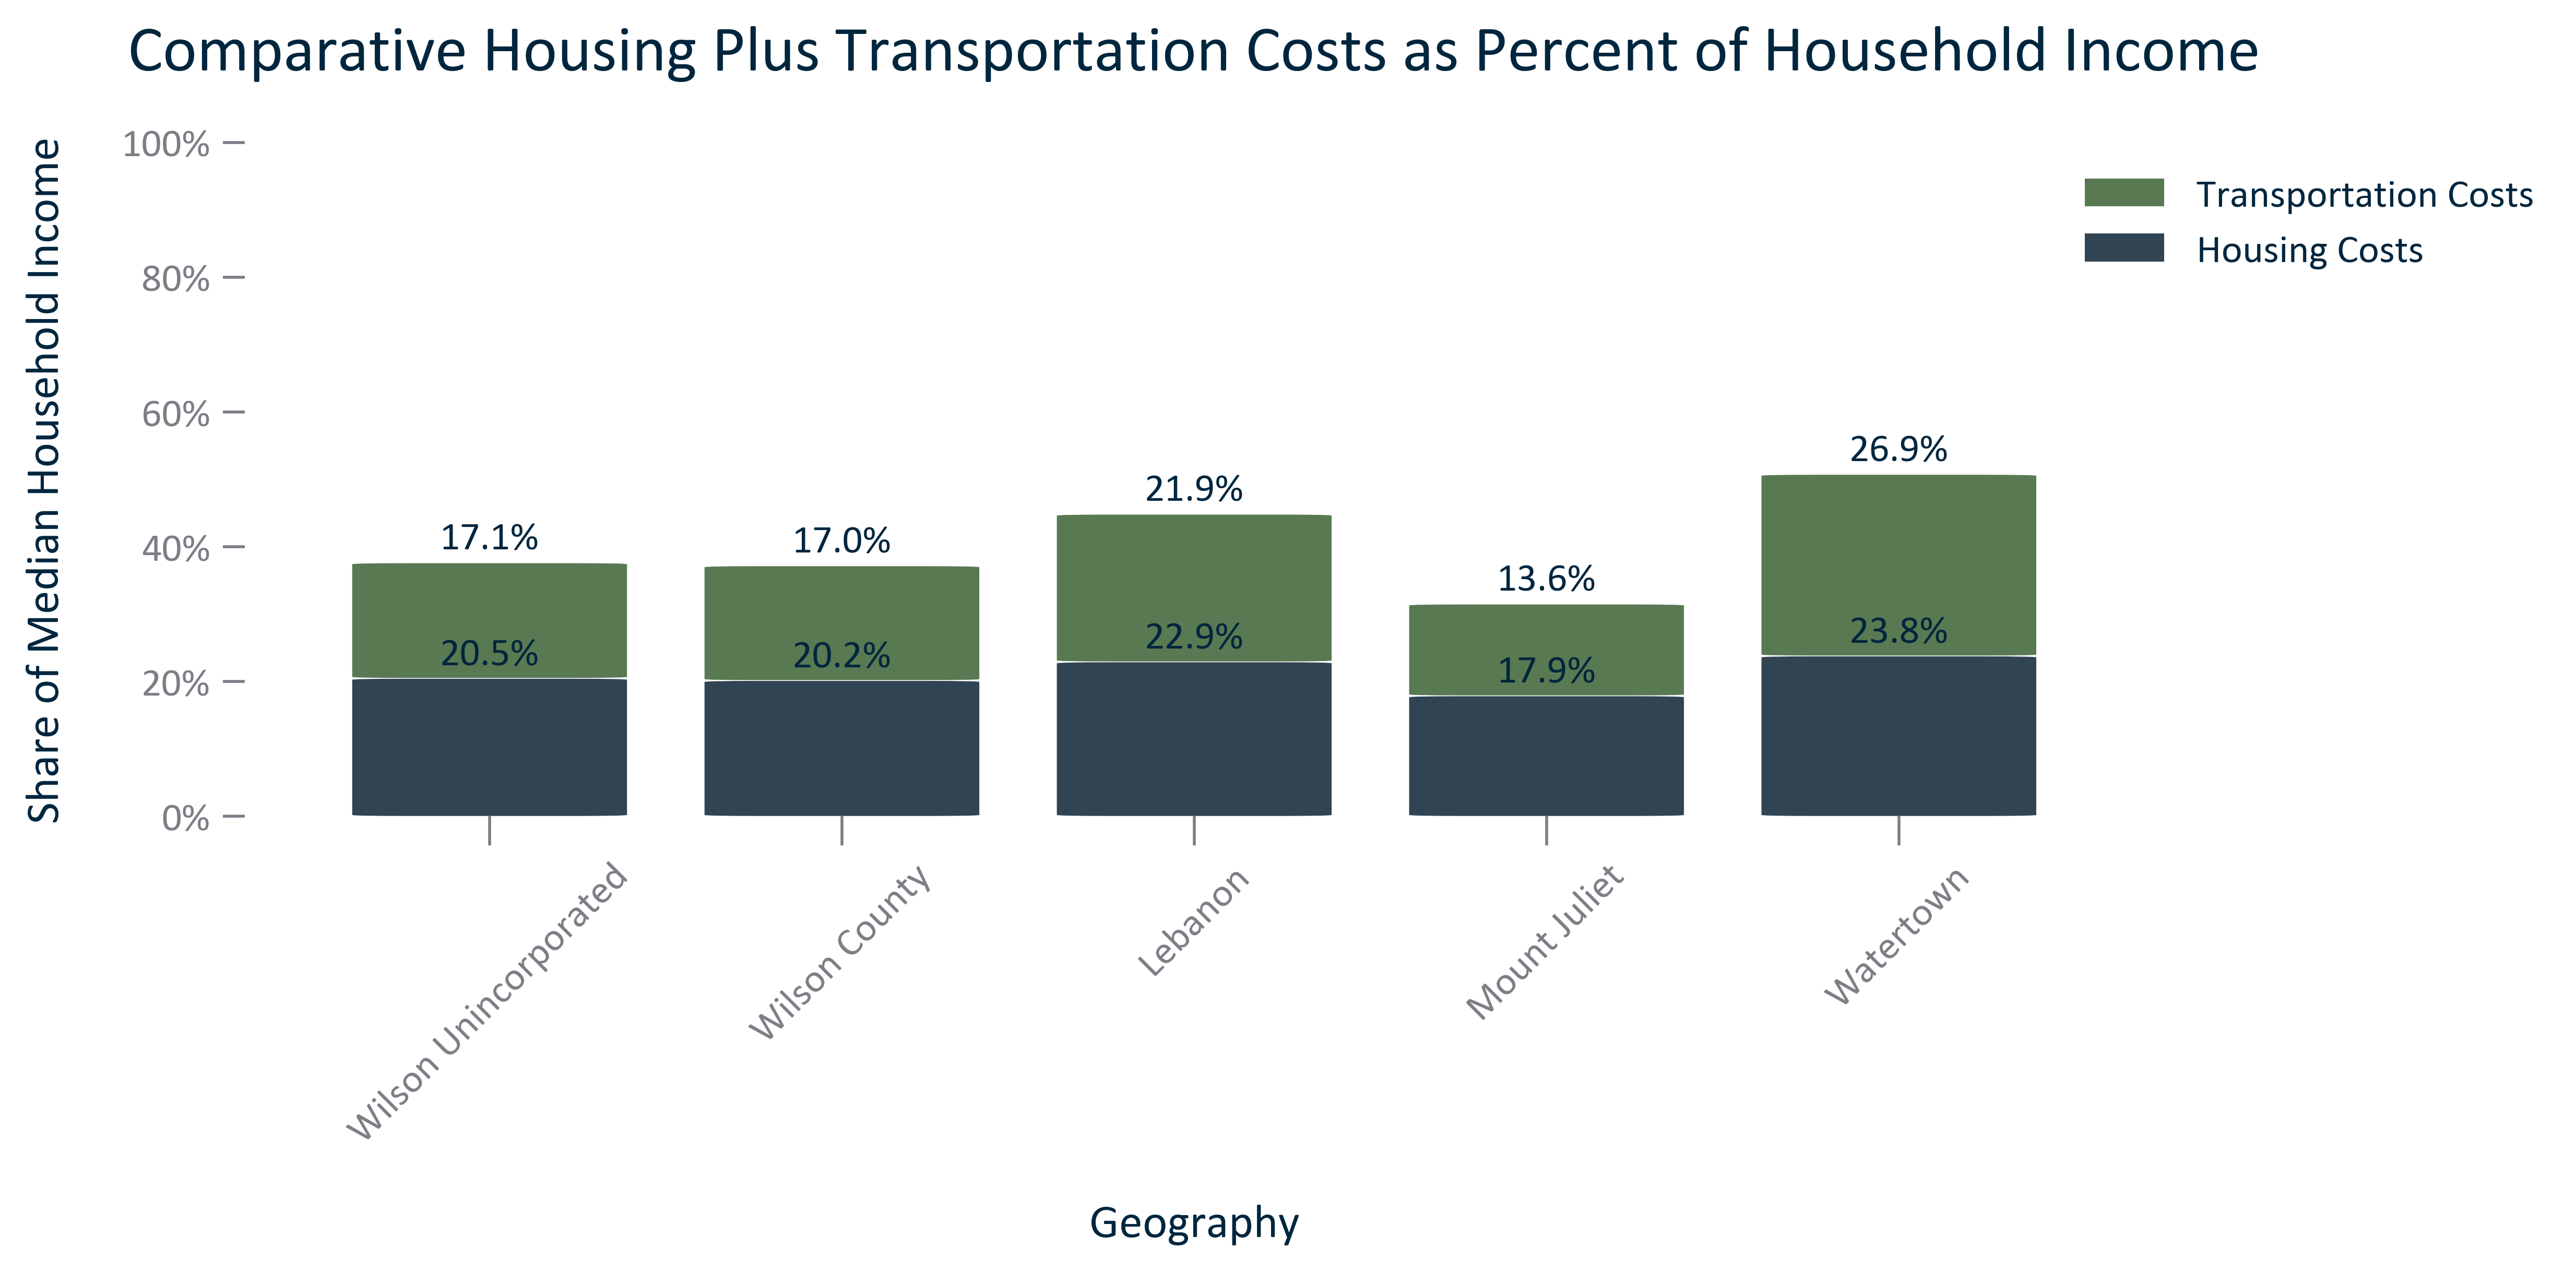

In [69]:
title = 'Comparative Housing Plus Transportation Costs as Percent of Household Income'
#set up temporary dataframe
df_temp = cnt.loc[cnt['Year'] == 2020]
df_temp = df_temp[['NAME', 'Housing Cost as % of Median Household Income', 'Transportation Cost as % of Median Household Income']]
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols.remove(unincorporated)
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp.rename(columns = {'Housing Cost as % of Median Household Income': 'Housing Costs', 
                                    'Transportation Cost as % of Median Household Income': 'Transportation Costs'})
df_temp = df_temp.set_index('NAME')
#figure
fig, ax = plt.subplots()
w = 0.9
bottom = np.zeros(len(df_temp))
for i, col in enumerate(df_temp.columns):
    ax.bar(df_temp.index, df_temp[col], w, bottom=bottom, label=col)
    bottom += np.array(df_temp[col])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.set(title = title, xlabel = 'Geography', ylabel = 'Share of Median Household Income') #set the title and axes labels
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
ax.set_ylim(top=100)
#rounded boxes
roundedboxes(boxstyleinput)
#outside legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(0.95, 1), frameon = False)
stackedbarlabels(abovestackedbarlabels)
#display and save
fig.savefig('../Figures/TENURECOST_stackedbar_geocomparative_CNThousingplustransportationcosts_current.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_stackedbar_geocomparative_CNThousingplustransportationcosts_current.png', bbox_inches='tight')
with open('../Figures/TENURECOST_stackedbar_geocomparative_CNThousingplustransportationcosts_current.txt', 'w') as text_file:
    text_file.write('Citation: Center for Neighborhood Technology, 2020 Housing and Transportation Index')
plt.show()
plt.close();

In [50]:
df_temp = cnt.loc[cnt['Year'] == 2020.0]
df_temp = df_temp[['NAME', 'Households', 'Annual Median Household Income', 'Annual Housing Cost', 
                   'Housing Cost as % of Median Household Income', 'Annual Transportation Cost', 
                   'Transportation Cost as % of Median Household Income', 'Difference Annual Median Household Income and Total Annual Costs']]
df_temp

NAME  Households  Annual Median Household Income  Annual Housing Cost  Housing Cost as % of Median Household Income  \
0          Wilson County     49664.0                         75991.0              18036.0                                     23.734390   
1  Wilson Unincorporated     25129.0                       -116797.0             -29460.0                                     25.223251   
2                Lebanon     11925.0                         54228.0              14604.0                                     26.930737   
3           Mount Juliet     11969.0                         91303.0              19332.0                                     21.173455   
4              Watertown       641.0                         47257.0              13560.0                                     28.694162   

   Annual Transportation Cost  Transportation Cost as % of Median Household Income  Difference Annual Median Household Income and Total Annual Costs  
0                     15231.0                                          20.043163                                              42724.0                 
1                    -28792.0                                          24.651318                                             -58545.0                 
2                     13959.0                                          25.741314                                              25665.0                 
3                     14714.0                                          16.115571                                              57257.0                 
4                     15350.0                                          32.481960                                              18347.0

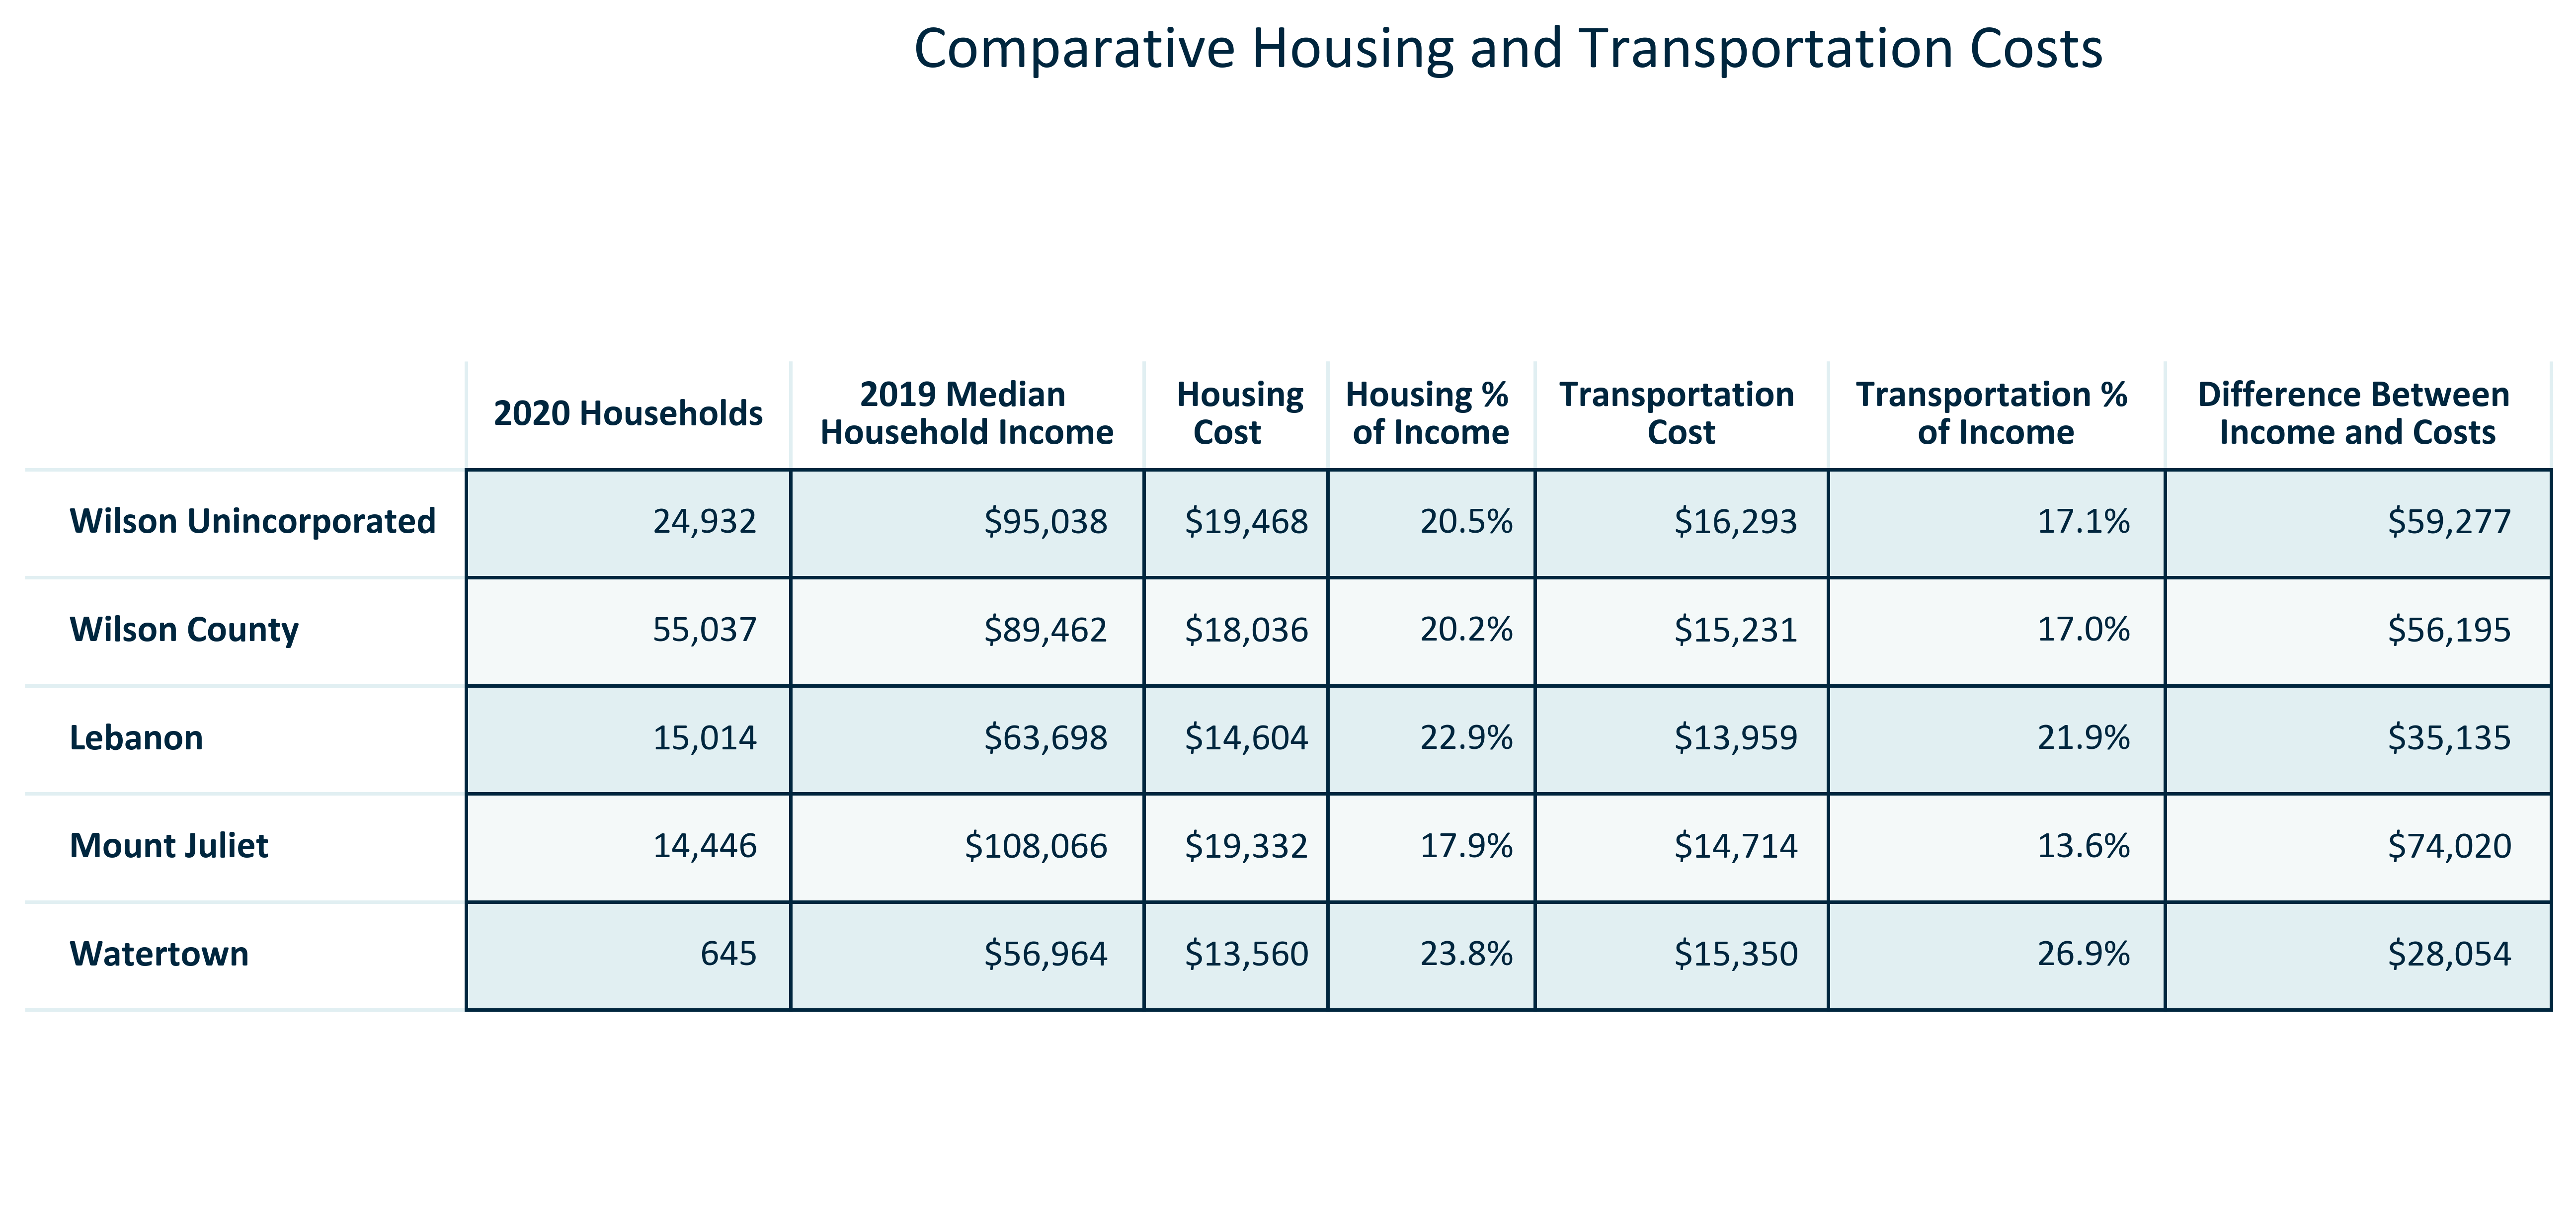

In [70]:
title = 'Comparative Housing and Transportation Costs'
df_temp = cnt.loc[cnt['Year'] == 2020.0]
df_temp = df_temp[['NAME', 'Households', 'Annual Median Household Income', 'Annual Housing Cost', 
                   'Housing Cost as % of Median Household Income', 'Annual Transportation Cost', 
                   'Transportation Cost as % of Median Household Income', 'Difference Annual Median Household Income and Total Annual Costs']]
df_temp = df_temp.sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols.remove(unincorporated)
newcols = [county] + newcols
newcols = [unincorporated] + newcols
df_temp = df_temp.reindex(newcols)#.reset_index(drop = False)
df_temp = df_temp.rename(columns = {'Annual Median Household Income': '2019 Median \nHousehold Income', 
                                    'Annual Housing Cost': '  Housing \nCost  ', 
                                    'Households': '2020 Households',
                                    'Housing Cost as % of Median Household Income': 'Housing % \nof Income', 
                                    'Annual Transportation Cost': 'Transportation \nCost', 
                                    'Transportation Cost as % of Median Household Income': 'Transportation % \nof Income',
                                    'Difference Annual Median Household Income and Total Annual Costs': 'Difference Between \nIncome and Costs'})
df_temp.update(df_temp[['Housing % \nof Income', 'Transportation % \nof Income']].applymap('{:,.1f}%'.format))
df_temp.update(df_temp[['2020 Households']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['2019 Median \nHousehold Income', '  Housing \nCost  ', 'Transportation \nCost', 
                        'Difference Between \nIncome and Costs']].applymap('${:,.0f}'.format))
df_temp = df_temp.replace({'nan%': '-', 'inf%': '-'})
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 1.05)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
fig.savefig('../Figures/TENURECOST_table_geocomparative_CNThousingandtransportation_Current.svg', bbox_inches='tight')
fig.savefig('../Figures/TENURECOST_table_geocomparative_CNThousingandtransportation_Current.png', bbox_inches='tight')
with open('../Figures/TENURECOST_table_geocomparative_CNThousingandtransportation_Current.txt', 'w') as text_file:
    text_file.write('Citation: Center for Neighborhood Technology, 2020 Housing and Transportation Index, median household income is 2015-2019 ACS 5-Year to match')
plt.show()
plt.close();

In [ ]:
crashesgeos = ['Wilson Unincorporated', 'Wilson Incorporated']
#Crashes
conn = sq.connect('../../../Data-Pipelines/Outputs/Dem_Transpo_Housing_Collection.db')
sql_query = pd.read_sql('SELECT * FROM [Crashes_Annual]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.loc[data['Year'] != 'None']
data['Year'] = data['Year'].astype(float)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[crashesgeos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
crashes = data

In [ ]:
Primary = 'Wilson Unincorporated'
Inc = 'Wilson Incorporated'

In [ ]:
title = 'Comparative Total Crashes Over Time'
df_temp = crashes.loc[crashes['Year'] != 0.0]
df_temp = df_temp[['NAME', 'Year', 'Crashes Total']]
df_temp.update(df_temp[['Year']].applymap('{:.0f}'.format))
df_temp.update(df_temp[['Crashes Total']].applymap('{:,.0f}'.format))
df_temp = df_temp.rename(columns = {'Crashes Total': 'Total Crashes'}).set_index(['Year', 'NAME'])
df_temp = df_temp.unstack('Year')
df_temp.columns = df_temp.columns.droplevel(0)
newcols = [Primary, Inc]
df_temp = df_temp.reindex(newcols)
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
#index length + 2 for merge column table
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.65)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2.5, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/TRANSPO_table_geocomparative_totalcrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_table_geocomparative_totalcrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_table_geocomparative_totalcrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Share of Total Crashes Resulting in\nFatality Over Time Unincorporated County'
df_temp = crashes.loc[(crashes['NAME'] == Primary) & crashes['Year'] != 0.0]
df_temp = df_temp[['Year', 'Crashes:Fatal', 'Crashes%:Fatal']]
df_temp.update(df_temp[['Year', 'Crashes:Fatal']].applymap('{:.0f}'.format))
df_temp = df_temp.rename(columns = {'Crashes:Fatal': 'Number of Fatal Crashes', 
                                   'Crashes%:Fatal': 'Share of Total Crashes Fatal'})
df_temp.update(df_temp[['Share of Total Crashes Fatal']].applymap('{:.1f}%'.format))
df_temp = df_temp.set_index('Year').transpose() 
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
#index length + 2 for merge column table
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.65)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2.5, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/TRANSPO_table_primarygeo_fatalcrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_table_primarygeo_fatalcrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_table_primarygeo_fatalcrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Share of Total Crashes Resulting in\nSerious Injury Over Time Unincorporated County'
df_temp = crashes.loc[(crashes['NAME'] == Primary) & crashes['Year'] != 0.0]
df_temp = df_temp[['Year', 'Crashes:Serious Injury', 'Crashes%:Serious Injury']]
df_temp.update(df_temp[['Year', 'Crashes:Serious Injury']].applymap('{:.0f}'.format))
df_temp.update(df_temp[['Crashes%:Serious Injury']].applymap('{:.1f}%'.format))
df_temp = df_temp.rename(columns = {'Crashes:Serious Injury': 'Number of Serious Injury Crashes', 
                                   'Crashes%:Serious Injury': 'Share of Total Crashes Resulting\nin Serious Injury'})
df_temp = df_temp.set_index('Year').transpose() 
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
#index length + 2 for merge column table
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.65)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2.5, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/TRANSPO_table_primarygeo_seriousinjurycrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_table_primarygeo_seriousinjurycrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_table_primarygeo_seriousinjurycrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Total Crashes Over Time'
xinput = 'Year'
yinput = 'Crashes Total'
df_temp1 = crashes.loc[(crashes['NAME'] == Primary) & (crashes['Year'] != 0.0)]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = crashes.loc[(crashes['NAME'] == Inc) & (crashes['Year'] != 0.0)]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
#initiate figure and set parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x1, y1, label = linelabel1)
ax2.plot(x2, y2, color = C2, label = linelabel2)

ax1.set(title = title, xlabel = xinput, ylabel = 'Total Crashes ' + Primary)
ax2.set(ylabel = 'Total Crashes ' + Inc)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
#plt.locator_params(axis='x', nbins=3)
ax1.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left')
ax2.legend(bbox_to_anchor=(0.4, 0.2), loc='upper left')
#display and save
fig.savefig('../Figures/TRANSPO_line_geocomparative_totalcrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_line_geocomparative_totalcrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_line_geocomparative_totalcrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Total Fatal Crashes Over Time'
xinput = 'Year'
yinput = 'Crashes:Fatal'
df_temp1 = crashes.loc[(crashes['NAME'] == Primary) & (crashes['Year'] != 0.0)]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = crashes.loc[(crashes['NAME'] == Inc) & (crashes['Year'] != 0.0)]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
#initiate figure and set parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x1, y1, label = linelabel1)
ax2.plot(x2, y2, color = C2, label = linelabel2)

ax1.set(title = title, xlabel = xinput, ylabel = 'Total Crashes ' + Primary)
ax2.set(ylabel = 'Total Crashes ' + Inc)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
#plt.locator_params(axis='x', nbins=3)
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(0, 0.9), loc='upper left')
#display and save
fig.savefig('../Figures/TRANSPO_line_geocomparative_fatalcrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_line_geocomparative_fatalcrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_line_geocomparative_fatalcrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Share of Total Crashes Resulting in Fatality Over Time'
xinput = 'Year'
yinput = 'Crashes%:Fatal'
df_temp1 = crashes.loc[(crashes['NAME'] == Primary) & (crashes['Year'] != 0.0)]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = crashes.loc[(crashes['NAME'] == Inc) & (crashes['Year'] != 0.0)]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
#initiate figure and set parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x1, y1, label = linelabel1)
ax2.plot(x2, y2, color = C2, label = linelabel2)

ax1.set(title = title, xlabel = xinput, ylabel = 'Total Crashes ' + Primary)
ax2.set(ylabel = 'Total Crashes ' + Inc)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentformat)) #y axis formatting
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentformat)) #y axis formatting
#plt.locator_params(axis='x', nbins=3)
ax1.legend(bbox_to_anchor=(0.4, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(0.4, 0.9), loc='upper left')
#display and save
fig.savefig('../Figures/TRANSPO_line_geocomparative_percentfatalcrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_line_geocomparative_percentfatalcrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_line_geocomparative_percentfatalcrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Total Serious Injury Crashes Over Time'
xinput = 'Year'
yinput = 'Crashes:Serious Injury'
df_temp1 = crashes.loc[(crashes['NAME'] == Primary) & (crashes['Year'] != 0.0)]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = crashes.loc[(crashes['NAME'] == Inc) & (crashes['Year'] != 0.0)]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
#initiate figure and set parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x1, y1, label = linelabel1)
ax2.plot(x2, y2, color = C2, label = linelabel2)

ax1.set(title = title, xlabel = xinput, ylabel = 'Total Crashes ' + Primary)
ax2.set(ylabel = 'Total Crashes ' + Inc)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
#plt.locator_params(axis='x', nbins=3)
ax1.legend(bbox_to_anchor=(0.55, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(0.55, 0.9), loc='upper left')
#display and save
fig.savefig('../Figures/TRANSPO_line_geocomparative_seriousinjurycrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_line_geocomparative_seriousinjurycrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_line_geocomparative_seriousinjurycrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Share of Total Crashes Resulting in Serious Injury Over Time'
xinput = 'Year'
yinput = 'Crashes%:Serious Injury'
df_temp1 = crashes.loc[(crashes['NAME'] == Primary) & (crashes['Year'] != 0.0)]
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = crashes.loc[(crashes['NAME'] == Inc) & (crashes['Year'] != 0.0)]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
#initiate figure and set parameters
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x1, y1, label = linelabel1)
ax2.plot(x2, y2, color = C2, label = linelabel2)

ax1.set(title = title, xlabel = xinput, ylabel = 'Total Crashes ' + Primary)
ax2.set(ylabel = 'Total Crashes ' + Inc)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentformat)) #y axis formatting
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentformat)) #y axis formatting
#plt.locator_params(axis='x', nbins=3)
ax1.legend(bbox_to_anchor=(0.55, 1), loc='upper left')
ax2.legend(bbox_to_anchor=(0.55, 0.9), loc='upper left')
#display and save
fig.savefig('../Figures/TRANSPO_line_geocomparative_percentseriousinjurycrashes_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/TRANSPO_line_geocomparative_percentseriousinjurycrashes_overtime.png', bbox_inches='tight')
with open('../Figures/TRANSPO_line_geocomparative_percentseriousinjurycrashes_overtime.txt', 'w') as text_file:
    text_file.write('Citation: Crash Data')
plt.show()
plt.close();

In [ ]:
#Annual Industry Employment JobsEQ
geos = ['Wilson Unincorporated', 'Wilson County', 'GNRC', 'Lebanon', 'Mount Juliet', 'Watertown']
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_IndustryEmployment_Annual_Change]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[geos]
data = data.transpose().reset_index(drop = False)
data['Ind%:Total'] = 0
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
jobseqindannual = data

In [ ]:
Primary = 'Wilson Unincorporated'

In [ ]:
title = 'Historical Employment Unincorporated County' #set title of figure
df_temp = jobseqindannual.loc[(jobseqindannual['Year'] <= 2020.0)&(jobseqindannual['NAME'] == Primary)]
df_temp = df_temp[['NAME', 'Year', 'Ind:Total']]
xinput = 'Year'
xlabel = xinput
yinput = 'Ind:Total'
ylabel = 'Employment'
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.plot(x, y, marker = 'o')
ax.set(title = title, xlabel = xinput, ylabel = ylabel)
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat))
# #data labels
#singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentplace_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentplace_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_historicalemploymentplace_overtime.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Historical Industry Employment Unincorporated County'
#set up temporary dataframe
xinput = 'Year'
#yinput = 'Employment'
df_temp = jobseqindannual.loc[(jobseqindannual['NAME'] == Primary)&(jobseqindannual['Year'] <= 2020.0)]
df_temp0 = df_temp[[xinput, 'Ind:Natural Resources & Mining']]
linelabel0 = 'Natural Resources & Mining'
x0 = df_temp0[xinput]
y0 = df_temp0['Ind:Natural Resources & Mining']
df_temp1 = df_temp[[xinput, 'Ind:Construction']]
#linelabel1 = str(df_temp1['Industry'].values[0])
linelabel1 = 'Construction'
x1 = df_temp1[xinput]
y1 = df_temp1['Ind:Construction']
df_temp2 = df_temp[[xinput, 'Ind:Manufacturing']]
#linelabel2 = str(df_temp2['Industry'].values[0])
linelabel2 = 'Manufacturing'
x2 = df_temp2[xinput]
y2 = df_temp2['Ind:Manufacturing']
df_temp3 = df_temp[[xinput, 'Ind:Trade, Transportation, & Utilities']]
#linelabel3 = str(df_temp3['Industry'].values[0])
linelabel3 = 'Trade, Transportation,\n& Utilities'
x3 = df_temp3[xinput]
y3 = df_temp3['Ind:Trade, Transportation, & Utilities']
df_temp4 = df_temp[[xinput, 'Ind:Information']]
#linelabel4 = str(df_temp4['Industry'].values[0])
linelabel4 = 'Information'
x4 = df_temp4[xinput]
y4 = df_temp4['Ind:Information']
df_temp5 = df_temp[[xinput, 'Ind:Financial Activities']]
#linelabel5 = str(df_temp5['Industry'].values[0])
linelabel5 = 'Financial Activities'
x5 = df_temp5[xinput]
y5 = df_temp5['Ind:Financial Activities']
df_temp6 = df_temp[[xinput, 'Ind:Professional & Business Services']]
#linelabel6 = str(df_temp6['Industry'].values[0])
linelabel6 = 'Professional &\nBusiness Services'
x6 = df_temp6[xinput]
y6 = df_temp6['Ind:Professional & Business Services']
df_temp7 = df_temp[[xinput, 'Ind:Education & Health Services']]
#linelabel7 = str(df_temp7['Industry'].values[0])
linelabel7 = 'Education & Health\nServices'
x7 = df_temp7[xinput]
y7 = df_temp7['Ind:Education & Health Services']
df_temp8 = df_temp[[xinput, 'Ind:Leisure & Hospitality']]
#linelabel8 = str(df_temp8['Industry'].values[0])
linelabel8 = 'Leisure &\nHospitality'
x8 = df_temp8[xinput]
y8 = df_temp8['Ind:Leisure & Hospitality']
df_temp9 = df_temp[[xinput, 'Ind:Public Administration']]
#linelabel9 = str(df_temp9['Industry'].values[0])
linelabel9 = 'Public Administration'
x9 = df_temp9[xinput]
y9 = df_temp9['Ind:Public Administration']
df_temp10 = df_temp[[xinput, 'Ind:Other/Unclassified']]
linelabel10 = 'Other/Unclassified'
x10 = df_temp10[xinput]
y10 = df_temp10['Ind:Other/Unclassified']

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, label = linelabel0)
ax.plot(x1, y1, label = linelabel1)
ax.plot(x2, y2, label = linelabel2)
ax.plot(x3, y3, label = linelabel3)
ax.plot(x4, y4, label = linelabel4)
ax.plot(x5, y5, label = linelabel5)
ax.plot(x6, y6, label = linelabel6)
ax.plot(x7, y7, label = linelabel7)
ax.plot(x8, y8, label = linelabel8)
ax.plot(x9, y9, label = linelabel9)
ax.plot(x10, y10, label = linelabel10)
ax.set(title = title, xlabel = xinput, ylabel = 'Industry Employment')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) #y axis formatting
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentbyindustryplace_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentbyindustryplace_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_historicalemploymentbyindustryplace_overtime.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Supersector Employment Over Time Unincorporated County'
df_temp = jobseqindannual.loc[(jobseqindannual['NAME'] == Primary) & (jobseqindannual['Year'] != 0.0)]
df_temp = df_temp[['Year', 'Ind%:Goods Producing', 'Ind%:Service Producing', 'Ind%:Trade, Transportation, & Utilities']]
df_temp = df_temp.rename(columns = {'Ind%:Goods Producing': 'Goods Producing', 'Ind%:Service Producing': 'Service Producing', 
                                    'Ind%:Trade, Transportation, & Utilities': 'Trade, Transportation, & Utilities'}) 
df_temp.update(df_temp[['Year']].applymap('{:.0f}'.format))
df_temp = df_temp.set_index('Year')
#figure
fig, ax = plt.subplots()
w = 0.9
bottom = np.zeros(len(df_temp))
for i, col in enumerate(df_temp.columns):
    ax.bar(df_temp.index, df_temp[col], w, bottom=bottom, label=col)
    bottom += np.array(df_temp[col])
#rounded boxes
roundedboxes(boxstyleinput)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.set(title = title, xlabel = 'Year', ylabel = 'Share of Employment') #set the title and axes labels
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#outside legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left', bbox_to_anchor=(0.95, 1), frameon = False)
# # For each patch (basically each rectangle within the bar), add a label.
#stackedbarlabels(belowstackedbarlabels)
#display and save
fig.savefig('../Figures/EMP_stackedbar_primarygeo_supersectoremploymentplace_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_stackedbar_primarygeo_supersectoremploymentplace_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_stackedbar_primarygeo_supersectoremploymentplace_overtime.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
#Quarterly Industry Employment JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_IndustryEmployment_Quarterly]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = ['Source', 'GEO_ID'], inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('TimeStamp')
cols.remove('Time')
data[cols] = data[cols].astype(float)
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
jobseqindquarterly = data

In [ ]:
import matplotlib.dates as mdates

In [ ]:
title = 'Quarterly Employment Unincorporated County: COVID-19 Impact'
xinput = 'TimeStamp'
yinput = 'Ind:Total'
df_temp = jobseqindquarterly.loc[(jobseqindquarterly['NAME'] == Primary)]
df_temp = df_temp[['NAME', 'TimeStamp', 'Ind:Total']]
linelabel = str(df_temp['NAME'].values[0])
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x, y, marker = 'o', label = linelabel)
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.set(title = title, xlabel = 'Year, Quarter', ylabel = 'Employment')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')#, size = 9)
#display and save
fig.savefig('../Figures/EMP_line_primarygeo_employmentquarterlycovid19_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_employmentquarterlycovid19_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_employmentquarterlycovid19_overtime.txt', 'w') as text_file:
    text_file.write('Citation: QCEW via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Quarterly County Employment: COVID-19 Impact'
xinput = 'TimeStamp'
yinput = 'Ind:Total'
df_temp = jobseqindquarterly.loc[(jobseqindquarterly['NAME'] == 'Wilson County')]
df_temp = df_temp[['NAME', 'TimeStamp', 'Ind:Total']]
linelabel = str(df_temp['NAME'].values[0])
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x, y, marker = 'o', label = linelabel)
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
ax.set(title = title, xlabel = 'Year, Quarter', ylabel = 'Employment')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')#, size = 9)
#display and save
fig.savefig('../Figures/EMP_line_county_employmentquarterlycovid19countyforplace_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_county_employmentquarterlycovid19countyforplace_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_county_employmentquarterlycovid19countyforplace_overtime.txt', 'w') as text_file:
    text_file.write('Citation: QCEW via JobsEQ')
plt.show()
plt.close();

In [ ]:
#Monthly LAUS JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_LAUS_Monthly]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = ['Source', 'GEO_ID'], inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('TimeStamp')
data[cols] = data[cols].astype(float)
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
jobseqlausmonthly = data

In [ ]:
import datetime

In [ ]:
title = 'Comparative Monthly Unemployment Rate Over Time (Seasonally Adjusted)'
#set up temporary dataframe
xinput = 'TimeStamp'
yinput = 'LF:Unemployment %'
#df_temp = lausmonthly.loc[lausmonthly['Datapoint'] == 'LF:Unemployment %']
df_temp = jobseqlausmonthly.loc[jobseqlausmonthly['TimeStamp'] >= '2020-01-01']
df_temp = df_temp.loc[df_temp['TimeStamp'] <= '2022-07-01']
df_temp0 = df_temp.loc[df_temp['NAME'] == 'Wilson County']
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
df_temp1 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'GNRC']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Tennessee']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'US']
#linelabel4 = str(df_temp4['NAME'].values[0])
linelabel4 = 'US'
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, linewidth = 1.1, label = linelabel0, zorder = 10)
ax.plot(x1, y1, linewidth = 0.8, linestyle = "--", color = 'red', label = linelabel1)
ax.plot(x2, y2, linewidth = 0.8, linestyle = "--", label = linelabel2)
ax.plot(x3, y3, linewidth = 0.8, linestyle = "--", label = linelabel3)
ax.plot(x4, y4, linewidth = 0.8, linestyle = "--", label = linelabel4)

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

ax.set(title = title, xlabel = xinput, ylabel = 'Unemployment Rate')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 3, 5, 7, 9, 11)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right', size = 9)
ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2022, 7, 1)])

ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_geocomparative_unemploymentmonthly_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_geocomparative_unemploymentmonthly_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_geocomparative_unemploymentmonthly_overtime.txt', 'w') as text_file:
    text_file.write('Citation: LAUS via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Industry Employment Unincorporated County Place of Work'
df_temp = jobseqindannual.loc[(jobseqindannual['NAME'] == Primary)&(jobseqindannual['Year'] == 2020.0)]
df_temp1 = df_temp[['Ind:Total', 'Ind:Natural Resources & Mining', 'Ind:Construction', 'Ind:Manufacturing', 'Ind:Trade, Transportation, & Utilities', 'Ind:Information', 
                  'Ind:Financial Activities', 'Ind:Professional & Business Services', 'Ind:Education & Health Services', 'Ind:Leisure & Hospitality', 
                  'Ind:Public Administration', 'Ind:Other/Unclassified']]
df_temp2 = df_temp[['Ind%:Total', 'Ind%:Natural Resources & Mining', 'Ind%:Construction', 'Ind%:Manufacturing', 'Ind%:Trade, Transportation, & Utilities', 'Ind%:Information', 
                  'Ind%:Financial Activities', 'Ind%:Professional & Business Services', 'Ind%:Education & Health Services', 'Ind%:Leisure & Hospitality', 
                  'Ind%:Public Administration', 'Ind%:Other/Unclassified']]
#df_temp = df_temp.drop(columns = ['Year', 'NAME'])
df_temp1 = df_temp1.rename(columns = {'Ind:Total': 'Total', 'Ind:Natural Resources & Mining': 'Natural Resources & Mining', 
                                    'Ind:Construction': 'Construction', 
                                    'Ind:Manufacturing': 'Manufacturing', 
                                    'Ind:Trade, Transportation, & Utilities': 'Trade, Transportation, & Utilities', 
                                    'Ind:Information': 'Information', 
                                    'Ind:Financial Activities': 'Financial Activities', 
                                    'Ind:Professional & Business Services': 'Professional & Business Services', 
                                    'Ind:Education & Health Services': 'Education & Health Services', 
                                    'Ind:Leisure & Hospitality': 'Leisure & Hospitality', 
                                    'Ind:Public Administration': 'Public Administration',
                                    'Ind:Other/Unclassified': 'Other/Unclassified'})
df_temp2 = df_temp2.rename(columns = {'Ind%:Total': 'Total', 'Ind%:Natural Resources & Mining': 'Natural Resources & Mining', 
                                    'Ind%:Construction': 'Construction', 
                                    'Ind%:Manufacturing': 'Manufacturing', 
                                    'Ind%:Trade, Transportation, & Utilities': 'Trade, Transportation, & Utilities', 
                                    'Ind%:Information': 'Information', 
                                    'Ind%:Financial Activities': 'Financial Activities', 
                                    'Ind%:Professional & Business Services': 'Professional & Business Services', 
                                    'Ind%:Education & Health Services': 'Education & Health Services', 
                                    'Ind%:Leisure & Hospitality': 'Leisure & Hospitality', 
                                    'Ind%:Public Administration': 'Public Administration',
                                    'Ind%:Other/Unclassified': 'Other/Unclassified'})
df_temp1 = df_temp1.transpose().reset_index(drop = False)
df_temp1 = df_temp1.rename(columns = {19: 'Employment'})
df_temp2 = df_temp2.transpose().reset_index(drop = False)
df_temp2 = df_temp2.rename(columns = {19: 'Percent of Employment'})
df_temp = df_temp1.merge(df_temp2, on = 'index').sort_values(by = 'Employment', ascending = False).set_index('index')
df_temp.update(df_temp[['Employment']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['Percent of Employment']].applymap('{:,.1f}%'.format))
df_temp = df_temp.replace({'0.0%':'-'})

#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
makeinvisible(guy1, guy2, guy3)
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', 
                 cellColours = colours, colColours = colcolours, cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
ax.set_title(label = title, y = 1.2)
row_headers = df_temp.index
column_headers = df_temp.columns
allheaders(col1, col2, edge1, edge2)
table.scale(2, 2.5)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
#display and save
fig.savefig('../Figures/EMP_table_primarygeo_industryemploymentplace_2023.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_primarygeo_industryemploymentplace_2023.png', bbox_inches='tight')
with open('../Figures/EMP_table_primarygeo_industryemploymentplace_2023.txt', 'w') as text_file:
    text_file.write('Citation: QCEW via JobsEQ')
plt.show()
plt.close();

In [ ]:
#JobsEQ Industry Employment Outlook
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_IndustryEmployment_3YROutlook]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Wilson County', 'Tennessee', 'GNRC', 'Lebanon', 'Mount Juliet', 'Watertown']
data = data[geos]
data = data.transpose().reset_index(drop = False)
jobseqindoutlook = data

In [ ]:
title = 'County Industry Employment Outlook'
df_temp = jobseqindoutlook.loc[jobseqindoutlook['NAME'] == county]
thelist = ['Snapshot 4: Professional Services', 'Snapshot 4: Industrial, Manufacturing, Utilities, & Logistics', 
           'Snapshot: Blue Collar', 'Snapshot: White Collar', 'Snapshot 4: Retail & Hospitality', 'Snapshot 4: Government'
          ]
df_temp = df_temp.loc[~df_temp['Industry'].isin(thelist)]
df_temp = df_temp[['Industry', 'Employment', 'Percent of Total', 
                   'Average Annual Wages', 'Location Quotient', '3 Year Forecast Growth Rate']].sort_values(by = 'Employment', ascending = False)
df_temp.update(df_temp[['Percent of Total', '3 Year Forecast Growth Rate']].applymap('{:,.1f}%'.format))
df_temp.update(df_temp[['Employment']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['Location Quotient']].applymap('{:,.2f}'.format))
df_temp.update(df_temp[['Average Annual Wages']].applymap('${:,.0f}'.format))
df_temp = df_temp.replace({'nan%':'-'}).set_index('Industry')
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 1.2)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_primarygeo_industryemploymentoutlook_2023Q4.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_primarygeo_industryemploymentoutlook_2023Q4.png', bbox_inches='tight')
with open('../Figures/EMP_table_primarygeo_industryemploymentoutlook_2023Q4.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
#TNECD Top Employers
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [TNECD_TopEmployers]', conn)
data = pd.DataFrame(sql_query)
data = data.loc[data['County'] == 'Wilson']
data = data.drop(columns = 'County')
cols = list(data.columns)
cols.remove('Employer')
cols.remove('City')
data[cols] = data[cols].astype(float)
topemployers = data

In [ ]:
title = 'Top Employers in Rutherford County'
df_temp = topemployers
df_temp = df_temp[['Employer', 'Estimated Employees', 'City']]
df_temp.update(df_temp[['Estimated Employees']].applymap('{:,.0f}'.format))
df_temp = df_temp.replace({'nan%':'-'}).set_index('Employer')
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 1.1)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_primarygeo_topcountyemployers_current.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_primarygeo_topcountyemployers_current.png', bbox_inches='tight')
with open('../Figures/EMP_table_primarygeo_topcountyemployers_current.txt', 'w') as text_file:
    text_file.write('Citation: TNECD')
plt.show()
plt.close();

In [ ]:
#Annual Occupational Employment JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_OccupationalEmployment_Annual_Change]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Rutherford Unincorporated', 'Rutherford County', 'GNRC', 'Eagleville', 'La Vergne', 'Murfreesboro', 'Nolensville', 'Smyrna']
data = data[geos]
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
jobseqoccannual = data

In [ ]:
title = 'Historical Unincorporated County Occupational Employment'
#set up temporary dataframe
xinput = 'Year'
#yinput = 'Employment'
df_temp = jobseqoccannual.loc[(jobseqoccannual['NAME'] == unincorporated)&(jobseqoccannual['Year'] <= 2020.0)]
df_temp0 = df_temp[[xinput, 'Occ:Healthcare Practitioners & Technical']]
linelabel0 = 'Healthcare Practitioners & Technical'
x0 = df_temp0[xinput]
y0 = df_temp0['Occ:Healthcare Practitioners & Technical']
df_temp1 = df_temp[[xinput, 'Occ:Healthcare Support']]
linelabel1 = 'Healthcare Support'
x1 = df_temp1[xinput]
y1 = df_temp1['Occ:Healthcare Support']
df_temp2 = df_temp[[xinput, 'Occ:Protective Services']]
linelabel2 = 'Protective Services'
x2 = df_temp2[xinput]
y2 = df_temp2['Occ:Protective Services']
df_temp3 = df_temp[[xinput, 'Occ:Production']]
linelabel3 = 'Production'
x3 = df_temp3[xinput]
y3 = df_temp3['Occ:Production']
df_temp4 = df_temp[[xinput, 'Occ:Transportation & Material Moving']]
linelabel4 = 'Transportation & Material Moving'
x4 = df_temp4[xinput]
y4 = df_temp4['Occ:Transportation & Material Moving']
df_temp5 = df_temp[[xinput, 'Occ:Business & Financial']]
linelabel5 = 'Business & Financial'
x5 = df_temp5[xinput]
y5 = df_temp5['Occ:Business & Financial']
df_temp6 = df_temp[[xinput, 'Occ:Computer, Mathematical, & Engineering']]
linelabel6 = 'Computer, Mathematical, & Engineering'
x6 = df_temp6[xinput]
y6 = df_temp6['Occ:Computer, Mathematical, & Engineering']
df_temp7 = df_temp[[xinput, 'Occ:Education, Legal, Social, Arts, & Media']]
linelabel7 = 'Education, Legal, Social, Arts, & Media'
x7 = df_temp7[xinput]
y7 = df_temp7['Occ:Education, Legal, Social, Arts, & Media']
df_temp8 = df_temp[[xinput, 'Occ:Food, Property, & Personal Services']]
linelabel8 = 'Food, Property, & Personal Services'
x8 = df_temp8[xinput]
y8 = df_temp8['Occ:Food, Property, & Personal Services']
df_temp9 = df_temp[[xinput, 'Occ:Sales & Office Support']]
linelabel9 = 'Sales & Office Support'
x9 = df_temp9[xinput]
y9 = df_temp9['Occ:Sales & Office Support']
df_temp10 = df_temp[[xinput, 'Occ:Natural Resources, Construction, & Maintenance']]
linelabel10 = 'Natural Resources, Construction, & Maintenance'
x10 = df_temp10[xinput]
y10 = df_temp10['Occ:Natural Resources, Construction, & Maintenance']

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, label = linelabel0)
ax.plot(x1, y1, label = linelabel1)
ax.plot(x2, y2, label = linelabel2)
ax.plot(x3, y3, label = linelabel3)
ax.plot(x4, y4, label = linelabel4)
ax.plot(x5, y5, label = linelabel5)
ax.plot(x6, y6, label = linelabel6)
ax.plot(x7, y7, label = linelabel7)
ax.plot(x8, y8, label = linelabel8)
ax.plot(x9, y9, label = linelabel9)
ax.plot(x10, y10, label = linelabel10)
ax.set(title = title, xlabel = xinput, ylabel = 'Occupational Employment')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentbyoccupation_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_historicalemploymentbyoccupation_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_historicalemploymentbyoccupation_overtime.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
#JobsEQ Occupational Employment Outlook
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_OccupationalEmployment_3YROutlook]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
geos = ['Rutherford County', 'GNRC', 'Eagleville', 'La Vergne', 'Murfreesboro', 'Nolensville', 'Smyrna']
data = data[geos]
data = data.transpose().reset_index(drop = False)
jobseqoccoutlook = data

In [ ]:
title = 'County Occupational Employment Outlook'
df_temp = jobseqoccoutlook.loc[jobseqoccoutlook['NAME'] == county]
df_temp = df_temp[['Occupation', 'Employment', 'Percent of Total', 
                   'Median Annual Wages', 'Location Quotient', '3 Year Forecast Growth Rate']].sort_values(by = 'Employment', ascending = False)
df_temp.update(df_temp[['Percent of Total', '3 Year Forecast Growth Rate']].applymap('{:,.1f}%'.format))
df_temp.update(df_temp[['Employment']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['Location Quotient']].applymap('{:,.2f}'.format))
df_temp.update(df_temp[['Median Annual Wages']].applymap('${:,.0f}'.format))
df_temp = df_temp.replace({'nan%':'-'}).set_index('Occupation')
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 1.2)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('../Figures/EMP_table_primarygeo_occupationalemploymentoutlook_2023Q4.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_table_primarygeo_occupationalemploymentoutlook_2023Q4.png', bbox_inches='tight')
with open('../Figures/EMP_table_primarygeo_occupationalemploymentoutlook_2023Q4.txt', 'w') as text_file:
    text_file.write('Citation: JobsEQ')
plt.show()
plt.close();

In [ ]:
#Annual Educational Awards Data JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_Awards_Annual_Change]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
jobseqawardsannual = data

In [ ]:
title = 'Educational Awards from County Institutions Over Time'
#set up temporary dataframe
xinput = 'Year'
#yinput = 'Awards'
df_temp = jobseqawardsannual.loc[jobseqawardsannual['NAME'] == county]
df_temp0 = df_temp[[xinput, 'Awards:All Award Levels']]
linelabel0 = 'All Award Levels'
x0 = df_temp0[xinput]
y0 = df_temp0['Awards:All Award Levels']
df_temp1 = df_temp[[xinput, "Awards:Master's or Above"]]
linelabel1 = "Master's or Above"
x1 = df_temp1[xinput]
y1 = df_temp1["Awards:Master's or Above"]
df_temp2 = df_temp[[xinput, "Awards:Bachelor's"]]
linelabel2 = "Bachelor's"
x2 = df_temp2[xinput]
y2 = df_temp2["Awards:Bachelor's"]
df_temp3 = df_temp[[xinput, "Awards:Associate's"]]
linelabel3 = "Associate's"
x3 = df_temp3[xinput]
y3 = df_temp3["Awards:Associate's"]
df_temp4 = df_temp[[xinput, 'Awards:Certificate > 2 Years']]
linelabel4 = 'Certificate > 2 Years'
x4 = df_temp4[xinput]
y4 = df_temp4['Awards:Certificate > 2 Years']
df_temp5 = df_temp[[xinput, "Awards:Certificate < 2 Years"]]
linelabel5 = "Certificate < 2 Years"
x5 = df_temp5[xinput]
y5 = df_temp5["Awards:Certificate < 2 Years"]


#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, marker = 'o', label = linelabel0)
ax.plot(x1, y1, marker = 'o', label = linelabel1)
ax.plot(x2, y2, marker = 'o', label = linelabel2)
ax.plot(x3, y3, marker = 'o', label = linelabel3)
ax.plot(x4, y4, marker = 'o', label = linelabel4)
ax.plot(x5, y5, marker = 'o', label = linelabel5)
ax.set(title = title, xlabel = xinput, ylabel = 'Awards')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
plt.fill_between(df_temp0['Year'], df_temp0['Awards:All Award Levels'], color= GNRCCOOLGRAY, alpha= 0.1)
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_county_awardsgranted_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_county_awardsgranted_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_county_awardsgranted_overtime.txt', 'w') as text_file:
    text_file.write('Citation: National Center for Education Statistics via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Davidson and Rutherford County Educational Awards Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'Awards:All Award Levels'
df_temp = jobseqawardsannual
df_temp1 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp5 = df_temp.loc[df_temp['NAME'] == county]
linelabel5 = str(df_temp5['NAME'].values[0])
x5 = df_temp5[xinput]
y5 = df_temp5[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x1, y1, marker = 'o', label = linelabel1)
ax.plot(x5, y5, marker = 'o', label = linelabel5)
ax.set_ylim(top = 20000, bottom = 1000)
ax.set(title = title, xlabel = xinput, ylabel = 'All Awards')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_geocomparative_topcountiesedawards_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_geocomparative_topcountiesedawards_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_geocomparative_topcountiesedawards_overtime.txt', 'w') as text_file:
    text_file.write('Citation: National Center for Education Statistics via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Awards by County Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'Awards:All Award Levels'
df_temp = jobseqawardsannual
df_temp0 = df_temp.loc[df_temp['NAME'] == 'Sumner County']
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
df_temp1 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
# df_temp2 = df_temp.loc[df_temp['NAME'] == 'Robertson County']
# linelabel2 = str(df_temp2['NAME'].values[0])
# x2 = df_temp2[xinput]
# y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Williamson County']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'Wilson County']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]
df_temp5 = df_temp.loc[df_temp['NAME'] == 'Rutherford County']
linelabel5 = str(df_temp5['NAME'].values[0])
x5 = df_temp5[xinput]
y5 = df_temp5[yinput]
df_temp6 = df_temp.loc[df_temp['NAME'] == 'Trousdale County']
linelabel6 = str(df_temp6['NAME'].values[0])
x6 = df_temp6[xinput]
y6 = df_temp6[yinput]
df_temp7 = df_temp.loc[df_temp['NAME'] == 'Cheatham County']
linelabel7 = str(df_temp7['NAME'].values[0])
x7 = df_temp7[xinput]
y7 = df_temp7[yinput]
df_temp8 = df_temp.loc[df_temp['NAME'] == 'Dickson County']
linelabel8 = str(df_temp8['NAME'].values[0])
x8 = df_temp8[xinput]
y8 = df_temp8[yinput]
# df_temp9 = df_temp.loc[df_temp['NAME'] == 'Houston County']
# linelabel9 = str(df_temp9['NAME'].values[0])
# x9 = df_temp9[xinput]
# y9 = df_temp9[yinput]
# df_temp10 = df_temp.loc[df_temp['NAME'] == 'Humphreys County']
# linelabel10 = str(df_temp10['NAME'].values[0])
# x10 = df_temp10[xinput]
# y10 = df_temp10[yinput]
df_temp11 = df_temp.loc[df_temp['NAME'] == 'Maury County']
linelabel11 = str(df_temp11['NAME'].values[0])
x11 = df_temp11[xinput]
y11 = df_temp11[yinput]
# df_temp13 = df_temp.loc[df_temp['NAME'] == 'Stewart County']
# linelabel13 = str(df_temp13['NAME'].values[0])
# x13 = df_temp13[xinput]
# y13 = df_temp13[yinput]

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x5, y5, marker = 'o', label = linelabel5)
ax.plot(x1, y1, marker = 'o', label = linelabel1)
ax.plot(x0, y0, marker = 'o', label = linelabel0)
ax.plot(x7, y7, marker = 'o', label = linelabel7)
ax.plot(x8, y8, marker = 'o', label = linelabel8)
ax.plot(x11, y11, marker = 'o', label = linelabel11)
ax.plot(x6, y6, marker = 'o', label = linelabel6)
ax.plot(x3, y3, marker = 'o', label = linelabel3)
ax.plot(x4, y4, marker = 'o', label = linelabel4)
#unused counties
#ax.plot(x2, y2, marker = 'o', label = linelabel2)
# ax.plot(x9, y9, marker = 'o', label = linelabel9)
# ax.plot(x10, y10, marker = 'o', label = linelabel10)
# ax.plot(x13, y13, marker = 'o', label = linelabel13)

ax.set(title = title, xlabel = xinput, ylabel = 'All Awards')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_geocomparative_allawardscounties_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_geocomparative_allawardscounties_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_geocomparative_allawardscounties_overtime.txt', 'w') as text_file:
    text_file.write('Citation: National Center for Education Statistics via JobsEQ')
plt.show()
plt.close();

In [ ]:
#Annual Unemployment LAUS Data JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_LAUS_Annual_Change]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
jobseqlausannual = data

In [ ]:
title = 'Comparative Annual Unemployment Rate Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'LF:Unemployment %'
df_temp = jobseqlausannual
df_temp0 = df_temp.loc[df_temp['NAME'] == county]
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
df_temp1 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'GNRC']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Tennessee']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'US']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, linewidth = 1.1, label = linelabel0, zorder = 10)
ax.plot(x1, y1, linewidth = 0.8, linestyle = "--", color = 'red', label = linelabel1)
ax.plot(x2, y2, linewidth = 0.8, linestyle = "--", label = linelabel2)
ax.plot(x3, y3, linewidth = 0.8, linestyle = "--", label = linelabel3)
ax.plot(x4, y4, linewidth = 0.8, linestyle = "--", label = linelabel4)

ax.set(title = title, xlabel = xinput, ylabel = 'Unemployment Rate')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_geocomparative_unemploymentcounties_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_geocomparative_unemploymentcounties_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_geocomparative_unemploymentcounties_overtime.txt', 'w') as text_file:
    text_file.write('Citation: LAUS')
plt.show()
plt.close();

In [ ]:
#Annual GDP BEA Data JobsEQ
conn = sq.connect('../../../Data-Pipelines/Outputs/Labor_Economy.db')
sql_query = pd.read_sql('SELECT * FROM [JobsEQ_GDP_Annual_Change]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('Time Frame')
cols.remove('GEO_ID')
data['Year'] = data['Year'].replace({'None': 0})
data[cols] = data[cols].astype(float)
jobseqgdpannual = data

In [ ]:
title = 'County GDP Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'GDP:GDP'
df_temp = jobseqgdpannual
df_temp0 = df_temp.loc[df_temp['NAME'] == county]
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, marker = 'o', label = linelabel0)
ax.set(title = title, xlabel = xinput, ylabel = 'GDP')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(moneyformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_primarygeo_gdpcounty_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_gdpcounty_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_gdpcounty_overtime.txt', 'w') as text_file:
    text_file.write('Citation: BEA via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Comparative County GDP Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'GDP:GDP'
df_temp = jobseqgdpannual
df_temp0 = df_temp.loc[df_temp['NAME'] == 'Sumner County']
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
df_temp1 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel1 = str(df_temp1['NAME'].values[0])
x1 = df_temp1[xinput]
y1 = df_temp1[yinput]
df_temp2 = df_temp.loc[df_temp['NAME'] == 'Robertson County']
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = df_temp.loc[df_temp['NAME'] == 'Williamson County']
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = df_temp.loc[df_temp['NAME'] == 'Wilson County']
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]
df_temp5 = df_temp.loc[df_temp['NAME'] == 'Rutherford County']
linelabel5 = str(df_temp5['NAME'].values[0])
x5 = df_temp5[xinput]
y5 = df_temp5[yinput]
df_temp6 = df_temp.loc[df_temp['NAME'] == 'Trousdale County']
linelabel6 = str(df_temp6['NAME'].values[0])
x6 = df_temp6[xinput]
y6 = df_temp6[yinput]

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x5, y5, linewidth = 0.8, label = linelabel5, zorder = 10)

#ax.plot(x1, y1, linewidth = 0.8, linestyle = "--", color = 'red', label = linelabel1)
ax.plot(x2, y2, linewidth = 0.8, linestyle = "--", label = linelabel2)
ax.plot(x0, y0, linewidth = 1.1, linestyle = "--", label = linelabel0)
ax.plot(x5, y5, linewidth = 0.8, linestyle = "--", label = linelabel5)
ax.plot(x6, y6, linewidth = 0.8, linestyle = "--", label = linelabel6)
ax.plot(x3, y3, linewidth = 0.8, linestyle = "--", label = linelabel3)
ax.plot(x4, y4, linewidth = 0.8, linestyle = "--", label = linelabel4)

ax.set(title = title, xlabel = xinput, ylabel = 'GDP')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(moneyformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_geocomparative_gdpcounties_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_geocomparative_gdpcounties_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_geocomparative_gdpcounties_overtime.txt', 'w') as text_file:
    text_file.write('Citation: BEA via JobsEQ')
plt.show()
plt.close();

In [ ]:
title = 'Davidson County GDP Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'GDP:GDP'
df_temp = jobseqgdpannual
df_temp0 = df_temp.loc[df_temp['NAME'] == 'Davidson County']
linelabel0 = str(df_temp0['NAME'].values[0])
x0 = df_temp0[xinput]
y0 = df_temp0[yinput]
#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(x0, y0, marker = 'o', label = linelabel0)
ax.set(title = title, xlabel = xinput, ylabel = 'GDP')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(moneyformat)) 
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter(yearformat)) 
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/EMP_line_primarygeo_gdpcountydavidson_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/EMP_line_primarygeo_gdpcountydavidson_overtime.png', bbox_inches='tight')
with open('../Figures/EMP_line_primarygeo_gdpcountydavidson_overtime.txt', 'w') as text_file:
    text_file.write('Citation: BEA via JobsEQ')
plt.show()
plt.close();

In [ ]:
#TBI Crime Rate and Total Count
conn = sq.connect('../../../Data-Pipelines/Outputs/Dem_Transpo_Housing_Collection.db')
sql_query = pd.read_sql('SELECT * FROM [TBI_CrimeRate_2022]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
data = data.loc[data['County'] == 'Rutherford County, Tennessee']
cols = list(data.columns)
cols.remove('NAME')
cols.remove('County')
cols.remove('GEO_ID')
data[cols] = data[cols].astype(float)
tbirate = data

In [ ]:
tbirate

In [ ]:
title = 'Comparative Crime Count'
thelist = ["Rutherford County Sheriff's Office", 'Eagleville Police Department', 'LaVergne Police Department', 'Murfreesboro Police Department', 
           'Smyrna Police Department', 'Middle Tennessee State University']
df_temp = tbirate.loc[tbirate['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newprimarygeo = "Rutherford County Sheriff's Office"
newcols = list(df_temp.index)
newcols.remove(newprimarygeo)
#newcols.remove(county)
#newcols = [county] + newcols
newcols = [newprimarygeo] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp.replace({'Gallatin Police Department': 'Gallatin PD', 'Hendersonville Police Department': 'Hendersonville PD', 
                           'White House Police Department': 'White House PD', 'Portland Police Department': 'Portland PD', 
                           'Millersville Police Department': 'Millersville PD', 'Westmoreland Police Department': 'Westmoreland PD'})
df_temp = df_temp[['NAME', 'Number of Crimes']]
x = df_temp['NAME']
y = df_temp['Number of Crimes']
xlabel = 'Geography'
ylabel = 'Crime Count'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != newprimarygeo else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/CRIME_bar_geocomparative_crimecount_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/CRIME_bar_geocomparative_crimecount_2022.png', bbox_inches='tight')
with open('../Figures/CRIME_bar_geocomparative_crimecount_2022.txt', 'w') as text_file:
    text_file.write('Citation: Tennessee Bureau of Investigation')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Crime Rate Per 1,000 People'
thelist = ["Rutherford County Sheriff's Office", 'Eagleville Police Department', 'LaVergne Police Department', 'Murfreesboro Police Department', 
           'Smyrna Police Department', 'Middle Tennessee State University']
df_temp = tbirate.loc[tbirate['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newprimarygeo = "Rutherford County Sheriff's Office"
newcols.remove(newprimarygeo)
newcols = [newprimarygeo] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp.replace({'Gallatin Police Department': 'Gallatin PD', 'Hendersonville Police Department': 'Hendersonville PD', 
                           'White House Police Department': 'White House PD', 'Portland Police Department': 'Portland PD', 
                           'Millersville Police Department': 'Millersville PD', 'Westmoreland Police Department': 'Westmoreland PD'})
df_temp = df_temp[['NAME', 'Crime Rate (per 1,000)']]
x = df_temp['NAME']
y = df_temp['Crime Rate (per 1,000)']
xlabel = 'Geography'
ylabel = 'Crime Rate (per 1,000)'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != newprimarygeo else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/CRIME_bar_geocomparative_crimerate_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/CRIME_bar_geocomparative_crimerate_2022.png', bbox_inches='tight')
with open('../Figures/CRIME_bar_geocomparative_crimerate_2022.txt', 'w') as text_file:
    text_file.write('Citation: Tennessee Bureau of Investigation')
plt.show()
plt.close();

In [ ]:
#TBI Crime Type
conn = sq.connect('../../../Data-Pipelines/Outputs/Dem_Transpo_Housing_Collection.db')
sql_query = pd.read_sql('SELECT * FROM [TBI_CrimeType_2022]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('County')
cols.remove('GEO_ID')
data[cols] = data[cols].astype(float)
tbitype = data

In [ ]:
title = "Crime Type for Rutherford County Sheriff's Office"
df_temp = tbitype.loc[tbitype['NAME'] == "Rutherford County Sheriff's Office"]
df_temp = df_temp[['Murder', 'Kidnapping/Abduction', 'Burglary', 'Robbery', 'Animal Cruelty', 'Weapon Law Violations', 'Manslaughter', 
                   'Assault & Violent Sex Crime', 'Intimidation & Stalking', 'Arson, Destruction & Vandalism', 'Fraud', 
                   'Theft', 'Drugs & Narcotics Violations', 'Bribery, Forgery, Blackmail, Embezzlement & Gambling', 
                   'Prostitution, Commercial Sex Acts & Pornography, Aiding & Purchasing Prostitution']]
df_temp = df_temp.rename(columns = {'Kidnapping/Abduction': 'Kidnapping &\nAbduction', 'Animal Cruelty': 'Animal\nCruelty', 
                                    'Weapon Law Violations': 'Weapon Law\nViolations', 'Assault & Violent Sex Crime': 'Assault & Violent\nSex Crime', 
                                    'Intimidation & Stalking': 'Intimidation &\nStalking', 'Arson, Destruction & Vandalism': 'Arson &\Vandalism', 
                                    'Drugs & Narcotics Violations': 'Drugs &\nNarcotics', 
                                    'Bribery, Forgery, Blackmail, Embezzlement & Gambling': 'Financial Crimes', 
                                    'Prostitution, Commercial Sex Acts & Pornography, Aiding & Purchasing Prostitution': 'Prostitution\Related'})
df_temp = df_temp.melt(var_name = 'Crime Type', value_name = 'Count')
df_temp = df_temp.sort_values(by = 'Count', ascending = False)
#initiate figure and set parameters
x = df_temp['Crime Type']
y = df_temp['Count']
xlabel = 'Crime Type'
ylabel = "Crime Count"
#initiate figure and set parameters
fig, ax = plt.subplots()
#bar_color = [C2 if i != 'Any Language \nBesides English' else C1 for i in x]
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
#display and save
fig.savefig('../Figures/CRIME_bar_primarygeo_crimetype_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/CRIME_bar_primarygeo_crimetype_2022.png', bbox_inches='tight')
with open('../Figures/CRIME_bar_primarygeo_crimetype_2022.txt', 'w') as text_file:
    text_file.write('Citation: Tennessee Bureau of Investigation')
plt.show()
plt.close();

In [ ]:
#County Health Rankings
conn = sq.connect('../../../Data-Pipelines/Outputs/Dem_Transpo_Housing_Collection.db')
sql_query = pd.read_sql('SELECT * FROM [Uwisconsin_CountyHealthRankings_2022]', conn)
data = pd.DataFrame(sql_query)
data.drop(columns = 'Source', inplace = True)
data = data.set_index('NAME').transpose()
data = data.rename(columns = namestocommon)
data = data.transpose().reset_index(drop = False)
cols = list(data.columns)
cols.remove('NAME')
cols.remove('GEO_ID')
data[cols] = data[cols].astype(float)
countyhealth = data

In [ ]:
county = 'Wilson County'

In [ ]:
title = 'Comparative County Health Outcomes State Rankings'
thelist = ['Cheatham County', 'Davidson County', 'Dickson County', 'Houston County', 'Humphreys County', 'Montgomery County', 'Robertson County', 'Rutherford County', 
           'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County']
df_temp = countyhealth.loc[countyhealth['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', 'Health Outcomes']]
x = df_temp['NAME']
y = df_temp['Health Outcomes']
xlabel = 'Geography'
ylabel = 'Health Outcomes Ranking'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != county else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyhealthoutcomes_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyhealthoutcomes_2022.png', bbox_inches='tight')
with open('../Figures/HEALTH_bar_geocomparative_countyhealthoutcomes_2022.txt', 'w') as text_file:
    text_file.write('Citation: University of Wisconsin County Health Rankings')
plt.show()
plt.close();

In [ ]:
title = 'Comparative County Health Factors State Rankings'
thelist = ['Cheatham County', 'Davidson County', 'Dickson County', 'Houston County', 'Humphreys County', 'Montgomery County', 'Robertson County', 'Rutherford County', 
           'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County']
df_temp = countyhealth.loc[countyhealth['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', 'Health Factors']]
x = df_temp['NAME']
y = df_temp['Health Factors']
xlabel = 'Geography'
ylabel = 'Health Factors Ranking'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != county else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyhealthfactors_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyhealthfactors_2022.png', bbox_inches='tight')
with open('../Figures/HEALTH_bar_geocomparative_countyhealthfactors_2022.txt', 'w') as text_file:
    text_file.write('Citation: University of Wisconsin County Health Rankings')
plt.show()
plt.close();

In [ ]:
title = 'Comparative County Average Life Expectancy'
thelist = ['Cheatham County', 'Davidson County', 'Dickson County', 'Houston County', 'Humphreys County', 'Montgomery County', 'Robertson County', 'Rutherford County', 
           'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County']
df_temp = countyhealth.loc[countyhealth['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', 'Life Expectancy']]
x = df_temp['NAME']
y = df_temp['Life Expectancy']
xlabel = 'Geography'
ylabel = 'Average Life Expectancy'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != county else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
# #display and save
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyaveragelifeexpectancy_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/HEALTH_bar_geocomparative_countyaveragelifeexpectancy_2022.png', bbox_inches='tight')
with open('../Figures/HEALTH_bar_geocomparative_countyaveragelifeexpectancy_2022.txt', 'w') as text_file:
    text_file.write('Citation: University of Wisconsin County Health Rankings')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Share of County Individuals Experiencing Frequent Physical Distress'
thelist = ['Cheatham County', 'Davidson County', 'Dickson County', 'Houston County', 'Humphreys County', 'Montgomery County', 'Robertson County', 'Rutherford County', 
           'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County']
df_temp = countyhealth.loc[countyhealth['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', '% Frequent Physical Distress']]
x = df_temp['NAME']
y = df_temp['% Frequent Physical Distress']
xlabel = 'Geography'
ylabel = 'Share of Adults'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != county else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}%")
# #display and save
fig.savefig('../Figures/HEALTH_bar_geocomparative_frequentphysicaldistress_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/HEALTH_bar_geocomparative_frequentphysicaldistress_2022.png', bbox_inches='tight')
with open('../Figures/HEALTH_bar_geocomparative_frequentphysicaldistress_2022.txt', 'w') as text_file:
    text_file.write('Citation: University of Wisconsin County Health Rankings')
plt.show()
plt.close();

In [ ]:
title = 'Comparative Share of County Individuals Experiencing Frequent Mental Distress'
thelist = ['Cheatham County', 'Davidson County', 'Dickson County', 'Houston County', 'Humphreys County', 'Montgomery County', 'Robertson County', 'Rutherford County', 
           'Stewart County', 'Sumner County', 'Trousdale County', 'Williamson County', 'Wilson County']
df_temp = countyhealth.loc[countyhealth['NAME'].isin(thelist)].sort_values(by = 'NAME').set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(county)
newcols = [county] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
df_temp = df_temp[['NAME', '% Frequent Mental Distress']]
x = df_temp['NAME']
y = df_temp['% Frequent Mental Distress']
xlabel = 'Geography'
ylabel = 'Share of Adults'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != county else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}%")
# #display and save
fig.savefig('../Figures/HEALTH_bar_geocomparative_frequentmentaldistress_2022.svg', bbox_inches='tight')
fig.savefig('../Figures/HEALTH_bar_geocomparative_frequentmentaldistress_2022.png', bbox_inches='tight')
with open('../Figures/HEALTH_bar_geocomparative_frequentmentaldistress_2022.txt', 'w') as text_file:
    text_file.write('Citation: University of Wisconsin County Health Rankings')
plt.show()
plt.close();